## Karatsuba multiplication:  
This algorithm aims to efficiently multiply 2 large numbers, and can be further generalized to multiplying any two polynomial functions. (Here in this case the base is 10)

In [4]:
def karatsuba(x, y):
    """
    input: two strings x and y.
    output: the product of x, y converted into integers.
    """
    # base case
    if int(x) < 10 or int(y) < 10:
        return int(x)*int(y)

    # make x, y be of the same length
    while len(x) < len(y):
        x = '0' + x
    while len(x) > len(y):
        y = '0' + y
    # make sure the length of x, y is an even number
    if len(x) % 2 != 0:
        x = '0' + x
        y = '0' + y
    # divide into subproblems and recurse
    mid = int(len(x)/2)
    a, b, c, d = x[0:mid], x[mid:], y[0:mid], y[mid:]
    ac = karatsuba(a,c)
    bd = karatsuba(b,d)
    adbc = karatsuba(str(int(a) + int(b)), str(int(c) + int(d))) - ac - bd
    ans = (10**len(x))*ac + (10**(len(x)/2))*adbc + bd                  

    return ans

In [5]:
x = '3141592653589793238462643383279502884197169399375105820974944592'
y = '2718281828459045235360287471352662497757247093699959574966967627'
print(karatsuba(x, y))

8.539734222673568e+126


## Big-O Notation:  
Only need to remember that Big-O() is the upper bound of running time in the worst case. For large n, running time must be less than some constant * Big-O(). While on the other side, Big-Omega() is the lower bound of running time in the best case, for large n, running time must be greater than some constant * Big-Omega(). In other words, we cannot do better than Big-Omega(), and Big-O() reflects how fast our algorithm is in the worst case. If running time is both Big-O(f(n)) and Big-Omega(f(n)), then it is the Big-Theta(f(n)).  
**Last but not least, remember, the big-O notation only has its meaning in comparing algorithms for the same kind of problems, it's pointless to compare algorithms adapted for different contexts, they are just apples and oranges.**

## Count inversions
Count the number of inversions in an array (the number of pairs `(i,j)` of array indices with `i < j and A[i] > A[j]` ).  
The number of inversions can be seen as a measure of the distance between two strings or sequences, or, how far is array A from its sorted version. The iterative version of this algorithm takes quadratic time, but we can do better.

In [1]:
def count_inversion(arr):
    """
    input: an unsorted array
    output: a tuple(the # of inversions, the sorted array in asc order)
    """
    if len(arr) == 1:
        return (0, arr)
    else:
        mid = len(arr) // 2
        count1, A = count_inversion(arr[:mid])  # count along the way as we sort
        count2, B = count_inversion(arr[mid:])  # count along the way as we sort
        count = count1 + count2
        
        # merge A,B(both sorted) into C(sorted), count along the way, and sum up counts
        i, j, C = 0, 0, []
        
        for _ in range(len(arr)):
            if i < len(A) and j < len(B):
                if (A[i] <= B[j]):
                    C.append(A[i])
                    i +=1
                else:
                    C.append(B[j])
                    j +=1
                    count += (len(A) - i)  # key point
            # if B is exhausted first, append A to C
            elif i < len(A):
                C.append(A[i])
                i +=1
            # if A is exhausted first, append B to C
            elif j < len(B):
                C.append(B[j])
                j +=1

        return (count, C)

In [8]:
import numpy as np

arr = list(np.random.randint(0, 30, 10))
print(arr)

[15, 24, 13, 10, 11, 14, 5, 1, 9, 10]


In [9]:
count_inversion(arr)

(34, [1, 5, 9, 10, 10, 11, 13, 14, 15, 24])

In [21]:
with open('support/IntegerArray.txt','rt') as fh:
    arr = [int(line.strip('\n')) for line in fh.readlines()]
    
print(arr[:10])

[54044, 14108, 79294, 29649, 25260, 60660, 2995, 53777, 49689, 9083]


In [23]:
(count, sorted_arr) = count_inversion(arr)
print(count)
print(sorted_arr[:100])

2407905288
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


## Strassen's matrices multiplication

In [22]:
def strassen(A, B):
    """
    input: square matrices A and B of the same size n, where n is a power of 2.
    output: the product of A and B.
    runtime: <= O(n**3), less than cubic time
    """
    k = A.shape[0] // 2
    if k == 0:
        return A * B

    A11, A12 = A[:k, :k], A[:k, k:]
    A21, A22 = A[k:, :k], A[k:, k:]
    B11, B12 = B[:k, :k], B[:k, k:]
    B21, B22 = B[k:, :k], B[k:, k:]
    
    T1 = strassen(A11 + A22, B11 + B22)
    T2 = strassen(A21 + A22, B11)
    T3 = strassen(A11, B12 - B22)
    T4 = strassen(A22, B21 - B11)
    T5 = strassen(A11 + A12, B22)
    T6 = strassen(A21 - A11, B11 + B12)
    T7 = strassen(A12 - A22, B21 + B22)
    
    ans = np.zeros(A.shape)
    ans[:k, :k] = T1 + T4 - T5 + T7
    ans[:k, k:] = T3 + T5
    ans[k:, :k] = T2 + T4
    ans[k:, k:] = T1 - T2 + T3 + T6
    
    return ans

In [19]:
import numpy as np

A = np.random.randint(0, 10, (4, 4))
A

array([[6, 8, 2, 2],
       [2, 6, 4, 3],
       [5, 1, 7, 3],
       [4, 1, 4, 4]])

In [20]:
B = np.random.randint(0, 10, (4, 4))
B

array([[4, 1, 7, 5],
       [0, 1, 7, 7],
       [4, 7, 2, 1],
       [1, 1, 4, 9]])

In [23]:
strassen(A, B)

array([[ 34.,  30., 110., 106.],
       [ 27.,  39.,  76.,  83.],
       [ 51.,  58.,  68.,  66.],
       [ 36.,  37.,  59.,  67.]])

## Closest pair in 2-D space
For this problem, the brute-force search takes quadratic time, and a better solution takes O(nlog(n)) time using divide and conquer paradigm. The key point is that, we must find the closet pair in the middle strip in linear time O(n). Please refer to the extra slides by UC Santa Barbara in this folder. Further, please check:  
https://en.wikipedia.org/wiki/Closest_pair_of_points_problem  
If you are interested in Closest pair in 3-D or higher dimensions, first read the sparsity theorem in the slide and google for more.

In [24]:
def distance(p1, p2):
    """ Calculate the distance between 2 points in 2-D space. """
    x_diff = p1[0] - p2[0]
    y_diff = p1[1] - p2[1]
    return np.sqrt(x_diff ** 2 + y_diff ** 2)

In [25]:
# use the brute-force version as a benchmark, to check/test our algorithm is correct.
def closetpair_brute_force(points):
    min_dist = np.inf
    for i in range(len(points)):
        for j in range(i + 1, len(points)):
            p1, p2 = points[i], points[j]
            dist = distance(p1, p2)
            if dist < min_dist:
                min_dist = dist
                min_pair = (p1, p2)
    return (min_dist, min_pair)

In [26]:
# it's easier to implement the brute-force version using built-in `itertools.combinations`
from itertools import combinations

def closetpair_brute_force_2(points):
    min_dist = np.inf
    for (p1, p2) in combinations(points, 2):
        dist = distance(p1, p2)
        if dist < min_dist:
            min_dist = dist
            min_pair = (p1, p2)
    return (min_dist, min_pair)

In [18]:
# test
points = [(0.098408754012625277, 0.74280296333228502)
         ,(0.077086466963399936, 0.29657822643731369)
         ,(0.56160732190468798, 0.54675608365280715)
         ,(0.82076413876723719, 0.3014490061746683)
         ,(0.42758995432097113, 0.19199854966752694)
         ]

In [19]:
closetpair_brute_force(points)  # should be 0.3568442489198817

(0.3568442489198817,
 ((0.561607321904688, 0.5467560836528071),
  (0.8207641387672372, 0.3014490061746683)))

In [20]:
closetpair_brute_force_2(points)  # should be 0.3568442489198817

(0.3568442489198817,
 ((0.561607321904688, 0.5467560836528071),
  (0.8207641387672372, 0.3014490061746683)))

__The `O(nlog(n))` solution:__  

1. Sort points according to their x-coordinates.
2. Split the set of points into two equal-sized subsets by a vertical line `x = center`.
3. Solve the problem recursively in the left and right subsets, which yields the min distance `min_l` and `min_r`.  
   Let `bandwidth = min(min_l, min_r)`.
4. Find the min distance `min_m` in the middle strip `(x_median - bandwidth, x_median + bandwidth)`.
5. Return `min(bandwidth, min_m)`.

**how to implement step 4 in linear time O(n)?**  
1. we first have the set of points sorted by y_coordinates, which gives us `points_y`.  
2. then, iterate over `points_y` (from bottom to top), for each point, only need to find its neighbors.  
3. calculate the distance to its neighbors, if the `distance < bandwidth`, update the minimum distance.  
4. after the iteration, we're done!

__why this works?__  

By mathematical analysis, we can prove that for each point in the strip, there are at most 6 points in the `(bandwidth x bandwidth**2)` rectangle that can potentially be the closest-pair candidates. or, for each possible candidate `(p,q)`, we can show that p and q are at most 7 positions apart in `points_y`. in other words, if 2 points could be a closest pair, they must also be close to each other in `points_y`.

You might be wondering why it's `O(n)` rather than `O(nlog(n))`, since the sort operation already takes `O(nlog(n))`.  
Here's the explanation:  
https://stackoverflow.com/questions/41403587/closest-pair-algorithm-from-n-log2-n-to-n-log-n-time?r=SearchResults  

__One caveat__: sort the points __ONLY ONCE! DO NOT__ sort inside the recursive function!

In [24]:
def closest_pair_in_strip(points_m, bandwidth):
    """
    input: a set of points in the strip, sorted by y coordinates
    output: a tuple(the closest distance, the closest pair) in the strip
    runtime: O(n)
    """
    n = len(points_m)
    
    # corner case
    if n <= 1:
        return (np.inf, None)
    elif n < 30:  # when n is small, brute force search is faster than divide-and-conquer
        return closetpair_brute_force_2(points_m)
    
    # init
    min_m = bandwidth
    pair_m = None
    
    # iterate through points_m, from bottom to top
    for i in range(len(points_m)):  # O(n) runtime
        
        # find 7 neighbors
        lower_bound = i + 1
        upper_bound = min(len(points_m), i + 8)  # avoid list index out of range
        
        for j in range(lower_bound, upper_bound):  # O(1) runtime with finite range
            dist = distance(points_m[i], points_m[j])
            if dist < bandwidth:
                # update min distance, closet pair
                min_m = dist
                pair_m = (points_m[i], points_m[j])

    return (min_m, pair_m)
    
def divide_conquer(points_x, points_y):
    """
    input: a set of points sorted by x_coordinates and y_coordinates
    output: a tuple(the closest distance, the closest pair)
    """
    n = len(points_x)
    mid = n // 2
    
    # base case
    if n <= 1:
        return (np.inf, None)
    elif n < 30:  # when n is small, brute force search is faster than divide-and-conquer
        return closetpair_brute_force_2(points_x)
    
    # in Python, True = 1, False = 0
    # find the median of x coordinates
    if n % 2:
        center = points_x[mid][0]
    else:
        center = (points_x[mid - 1][0] + points_x[mid][0]) / 2

    # divide into left/right halves sorted by x
    Lx = [p for p in points_x if p[0] <= center]
    Rx = [p for p in points_x if p[0] > center]
    
    # divide into left/right halves sorted by y
    Ly = [p for p in points_y if p[0] <= center]
    Ry = [p for p in points_y if p[0] > center]
    
    # make recursive calls on each half
    (min_l, pair_l) = divide_conquer(Lx, Ly)
    (min_r, pair_r) = divide_conquer(Rx, Ry)
    
    # filter points in the middle strip, find min distance
    bandwidth = min(min_l, min_r)
    points_m = [p for p in points_y if (center - bandwidth) <= p[0] <= (center + bandwidth)]
    (min_m, pair_m) = closest_pair_in_strip(points_m, bandwidth)
    
    # return the min distance among the 3
    if min_m < bandwidth:
        return (min_m, pair_m)
    elif min_l < min_r:
        return (min_l, pair_l)
    else:
        return (min_r, pair_r)
    
def closest_pair(points):
    """
    input: a list of points represented by tuples (x_coordinate, y_coordinate)
    output: a tuple(the closest distance, the closest pair)
    runtime: O(nlog(n))
    """
    # sort only once, keep the sorted copy
    points_x = sorted(points, key=lambda p: p[0])  # sort by x_coordinates
    points_y = sorted(points, key=lambda p: p[1])  # sort by y_coordinates

    return divide_conquer(points_x, points_y)

In [83]:
points = [tuple(p) for p in np.random.rand(1000, 2)]  # 1000 random points
points[:5]

[(0.9098102745460116, 0.85205622211603),
 (0.4005125863210278, 0.49029608352227816),
 (0.06418579697614857, 0.7108626798905852),
 (0.6881977271303684, 0.6362567239059305),
 (0.9459237501545525, 0.3392051486512775)]

In [84]:
closetpair_brute_force(points)

(0.0006443405685461124,
 ((0.1892610364858428, 0.07227952082218236),
  (0.18980129080362396, 0.07192837976734379)))

In [85]:
closetpair_brute_force_2(points)

(0.0006443405685461124,
 ((0.1892610364858428, 0.07227952082218236),
  (0.18980129080362396, 0.07192837976734379)))

In [86]:
closest_pair(points)

(0.0006443405685461124,
 ((0.18980129080362396, 0.07192837976734379),
  (0.1892610364858428, 0.07227952082218236)))

In [45]:
%timeit closetpair_brute_force(points)  # O(n**2)

2.17 s ± 10.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [46]:
%timeit closetpair_brute_force_2(points)  # O(n**2)

2.11 s ± 31.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [47]:
%timeit closest_pair(points)  # O(nlog(n))

82.2 ms ± 1.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Master Theorem
See slides. If you don't remember the equations, you can always induce by drawing a recursion tree.

## Haversine formula
Calculate distance between two latitude-longitude points.  
__Great-circle distance__:  
https://en.wikipedia.org/wiki/Great-circle_distance  
__Haversine formula__:  
https://en.wikipedia.org/wiki/Haversine_formula

In [87]:
# Python implementation on Stackoverflow
from math import cos, asin, sqrt

def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295     # Pi / 180
    a = 0.5 - cos((lat2 - lat1) * p) / 2 + cos(lat1 * p) * cos(lat2 * p) * (1 - cos((lon2 - lon1) * p)) / 2
    return 12742 * asin(sqrt(a)) # the diameter of the Earth is 12,742 km

## Merge sort

https://www.toptal.com/developers/sorting-algorithms

In [93]:
def merge_sort(lst):
    """
    Sort an array in ascending order
    runtime: O(nlog(n))
    """
    ans = []
    
    # base case
    if len(lst) <= 1:
        return lst
    
    # divide into halves and recurse
    mid = len(lst) // 2
    left = merge_sort(lst[:mid])
    right = merge_sort(lst[mid:])
    
    # merge left and right
    i, j = 0, 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            ans.append(left[i])
            i += 1
        else:
            ans.append(right[j])
            j += 1
            
    for k in range(i, len(left)):
        ans.append(left[k])
    for k in range(j, len(right)):
        ans.append(right[k])
    
    return ans

In [94]:
x = [6,1,2,3,3,3,4,1,7,3,52,3,4,1,6,5,7,8,9,3,2]
merge_sort(x)

[1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 5, 6, 6, 7, 7, 8, 9, 52]

## Quick sort

In [88]:
import random
        
def quicksort(arr):
    """
    Sort an array in ascending order
    runtime: O(nlog(n)) on average
    """
    n = len(arr)

    if n == 1:
        return arr

    else:
        rdm_idx = random.randint(0, n-1)
        pivot = arr[rdm_idx]
        arr[0], arr[rdm_idx] = arr[rdm_idx], arr[0]

        i = 1
        for j in range(i, n):
            if arr[j] < pivot:
                arr[i], arr[j] = arr[j], arr[i]
                i += 1

        arr[0] = arr[i-1]
        
        C = []
        if i > 1 and i < n:
            A = quicksort(arr[:i-1])
            B = quicksort(arr[i:])
            C.extend(A)
            C.append(pivot)
            C.extend(B)
        elif i == 1:
            C.append(pivot)
            B = quicksort(arr[i:])
            C.extend(B)
        else:
            A = quicksort(arr[:i-1])
            C.extend(A)
            C.append(pivot)
        
        return C

In [89]:
x = [654,14,14654,63,1,8,42,3,6485,33,5445,32,35,644,5487,8979,51,23]
x = quicksort(x)
print(x)

[1, 3, 8, 14, 23, 32, 33, 35, 42, 51, 63, 644, 654, 5445, 5487, 6485, 8979, 14654]


## Heap sort

In [91]:
import heapq

def heapsort(iterable):
    h = []
    for value in iterable:
        heapq.heappush(h, value)
    return [heapq.heappop(h) for _ in range(len(h))]

In [92]:
x = [654,14,14654,63,1,8,42,3,6485,33,5445,32,35,644,5487,8979,51,23]
print(heapsort(x))

[1, 3, 8, 14, 23, 32, 33, 35, 42, 51, 63, 644, 654, 5445, 5487, 6485, 8979, 14654]


## Randomized selection

In [156]:
def random_select_brute_force(arr, k):
    sarr = sorted(arr)
    return sarr[k]

In [157]:
x = [1,2,3,5,7,8,12,34,44,55,76]  # 11 numbers

In [158]:
random_select_brute_force(x, 1)

2

In [159]:
random_select_brute_force(x, 4)

7

In [162]:
random_select_brute_force(x, 10)

76

In [183]:
import random

def random_select(arr, k):
    """
    input: an array with n distinct numbers, and a number k, 0 <= k <= n-1
    output: the k-th order statistic (0-indexed), i.e., the k-th number in the sorted array
    runtime: O(n) on average
    """
    n = len(arr)
    
    if n == 1:
        return arr[0]
    
    # random select a pivot and swap with arr[0]
    pivot_idx = random.randint(0, n-1)
    pivot = arr[pivot_idx]
    arr[pivot_idx], arr[0] = arr[0], arr[pivot_idx]
    
    # partition around pivot
    i = 1
    for j in range(i, n):
        if arr[j] < pivot:
            arr[i], arr[j] = arr[j], arr[i]
            i += 1
    arr[0], arr[i - 1] = arr[i - 1], arr[0]
    
    # reduce the problem, make recursive calls
    if k == (i - 1):
        return arr[i - 1]
    elif k < (i - 1):
        return random_select(arr[:(i - 1)], k)
    else:
        return random_select(arr[i:], (k - i))    

In [184]:
x = [1,2,3,5,7,8,12,34,44,55,76]

In [185]:
random_select_brute_force(x, 1)

2

In [186]:
random_select(x, 1)

2

In [187]:
random_select_brute_force(x, 6)

12

In [188]:
random_select(x, 6)

12

In [189]:
random_select_brute_force(x, 9)

55

In [190]:
random_select(x, 9)

55

## Random contraction (min cut algorithm)

A LITTLE REMINDER:  

Graph algorithms are common in technical interviews, be well prepared, or you are just shooting in the dark. All the graph algorithms that we studied in this specialization takes linear time `O(m+n)`, where `m` is the number of edges and `n` the number of vertices(nodes). Nevertheless, a lot of people say that graph algorithms take quadratic time, which is also true actually. That is because, the number of edges `m` ranges from `n - 1`(sparse graph) to `n(n - 1)/2`(dense graph), so when people say quadratic time, they are saying that it takes quadratic time in terms of `n`, the number of vertices.

In [27]:
import sys

sys.path

['',
 '/usr/lib/python35.zip',
 '/usr/lib/python3.5',
 '/usr/lib/python3.5/plat-x86_64-linux-gnu',
 '/usr/lib/python3.5/lib-dynload',
 '/home/neo-mashiro/.local/lib/python3.5/site-packages',
 '/usr/local/lib/python3.5/dist-packages',
 '/usr/local/lib/python3.5/dist-packages/setuptools-38.5.1-py3.5.egg',
 '/usr/lib/python3/dist-packages',
 '/home/neo-mashiro/.local/lib/python3.5/site-packages/IPython/extensions',
 '/home/neo-mashiro/.ipython']

In [28]:
sys.path.append('support')

In [29]:
sys.path

['',
 '/usr/lib/python35.zip',
 '/usr/lib/python3.5',
 '/usr/lib/python3.5/plat-x86_64-linux-gnu',
 '/usr/lib/python3.5/lib-dynload',
 '/home/neo-mashiro/.local/lib/python3.5/site-packages',
 '/usr/local/lib/python3.5/dist-packages',
 '/usr/local/lib/python3.5/dist-packages/setuptools-38.5.1-py3.5.egg',
 '/usr/lib/python3/dist-packages',
 '/home/neo-mashiro/.local/lib/python3.5/site-packages/IPython/extensions',
 '/home/neo-mashiro/.ipython',
 'support']

For graph algorithms, visualization will be a great help!

In [32]:
from simplegraph import Graph  # DIY implementation

For graph algorithms, the argument is a graph, and usually the function will change/modify that graph. In principle, we should never alter any arguments in a function call(a method is okay), so, always remember to __deepcopy()__ a graph before running the algorithm.

In [40]:
import copy

a = [1, 2, 3, 4, ['a', 'b']]
 
b = a
c = copy.copy(a)
d = copy.deepcopy(a)
 
a.append(5)
a[4].append('c')
 
print('a = ', a)
print('b = ', b)
print('c = ', c)
print('d = ', d)

a =  [1, 2, 3, 4, ['a', 'b', 'c'], 5]
b =  [1, 2, 3, 4, ['a', 'b', 'c'], 5]
c =  [1, 2, 3, 4, ['a', 'b', 'c']]
d =  [1, 2, 3, 4, ['a', 'b']]


In [73]:
import random, copy

def karger(graph):
    """
    return the minimum number of cuts(crossing edges) of a graph
    suppose the graph is represented by a symmetric dictionary / adjacency lists
    graph = {v1: [v2,v3,v4,...]
             v2: [v1,v5,...]
             ...
            }
    """
    G = copy.deepcopy(graph)
    
    while len(G) > 2:
        # pick an edge (v1,v2) uniformly at random
        v1 = random.choice(list(G.keys()))
        v2 = random.choice(G[v1])
        
        # contract (v1,v2)
        G[v1].extend(G[v2])
        
        for v in G[v2]:
            G[v].remove(v2)  # O(1) runtime
            G[v].append(v1)  # O(1) runtime
        
        # remove self-loops
        while v1 in G[v1]:
            G[v1].remove(v1)  # remove() only removes 1 elem each time
        
        # now v2 is an isolated vertex, remove it
        del G[v2]
        
    v1, v2 = list(G.keys())[0], list(G.keys())[1]
    assert len(G[v1]) == len(G[v2]), "last 2 vertices must have the same degree"
    
    return len(G[v1])

In [74]:
graph = {}

with open('support/kargerMinCut.txt','rt') as fh:
    for line in fh.readlines():
        # print each line to see how we should strip()/split()
        line = [i for i in line.strip('\n').strip('\t').split('\t')]
        graph[line[0]] = line[1:]

In [75]:
import numpy as np

def trials(n):
    count = 0
    min_cut = np.inf
    
    while count < n:
        count += 1
        G = copy.deepcopy(graph)
        cut = karger(G)
        if cut < min_cut:
            min_cut = cut
    
    return min_cut

In [79]:
trials(1)  # one trial solution might not be the best cut

24

In [80]:
trials(1)

20

In [81]:
trials(1)

22

In [82]:
trials(10)

17

In [83]:
trials(100)  # as we increase the number of trials, the chance of getting the best cut goes to 1

17

In [84]:
trials(1000)

17

## NetworkX warmup - make graphs for testing algorithms

sample palette
- `#00FF7F`  SpringGreen
- `#00BFFF`  DeepSkyBlue
- `#FF00FF`  Magenta
- `#BF3EFF`  DarkOrchid1
- `#F0FFF0`  Honeydew
- `#F0FFFF`  Azure

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

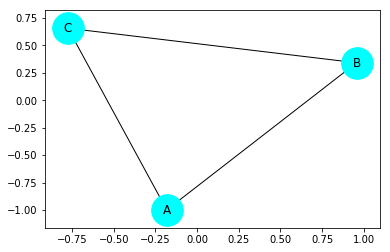

In [2]:
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'C')])
nx.draw_networkx(G, node_size=1000, node_color='aqua')

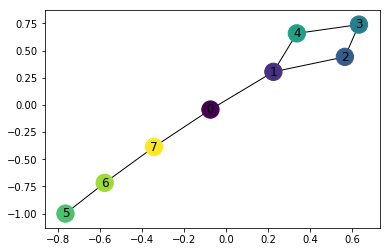

In [3]:
WS = nx.watts_strogatz_graph(8, 3, .25)
nx.draw_networkx(WS, node_color=WS.nodes())

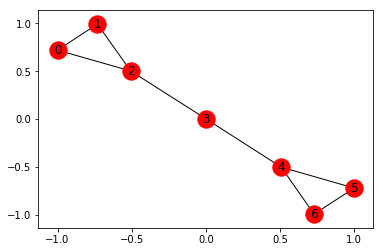

In [4]:
G = nx.barbell_graph(3, 1)
nx.draw_networkx(G)

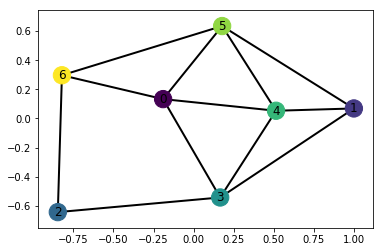

In [5]:
G = nx.barabasi_albert_graph(7, 3)
nx.draw_networkx(G, node_color=G.nodes(), width=2)

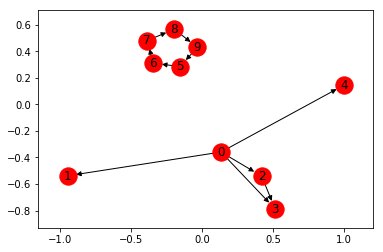

In [8]:
D = nx.DiGraph()
D.add_star(range(5))
D.add_cycle(range(5, 10))

edge = (2, 3)
D.add_edge(*edge)
nx.draw_networkx(D)

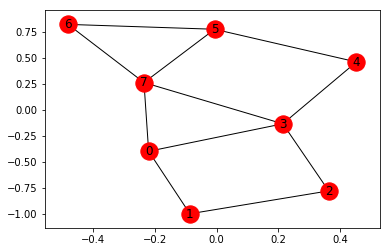

In [11]:
M = nx.MultiGraph()
M.add_cycle(range(8))
M.add_path([0,3,7,5])
nx.draw_networkx(M)

In [12]:
nx.has_path(M, 0, 5)

True

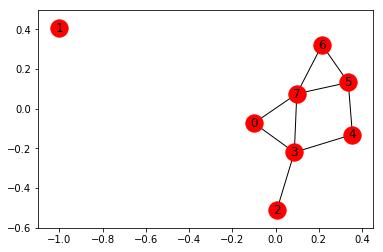

In [17]:
M.remove_edges_from([(2, 1), (1, 0)])
nx.draw_networkx(M)

In [19]:
nx.has_path(M, 1, 3)

False

In [511]:
# built-in algorithms
nx.algorithms??

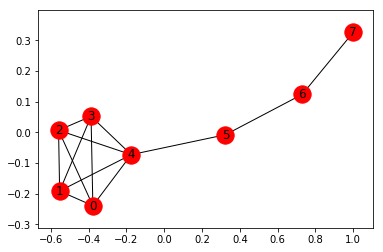

In [51]:
lollipop = nx.lollipop_graph(5, 3)
nx.draw_networkx(lollipop)

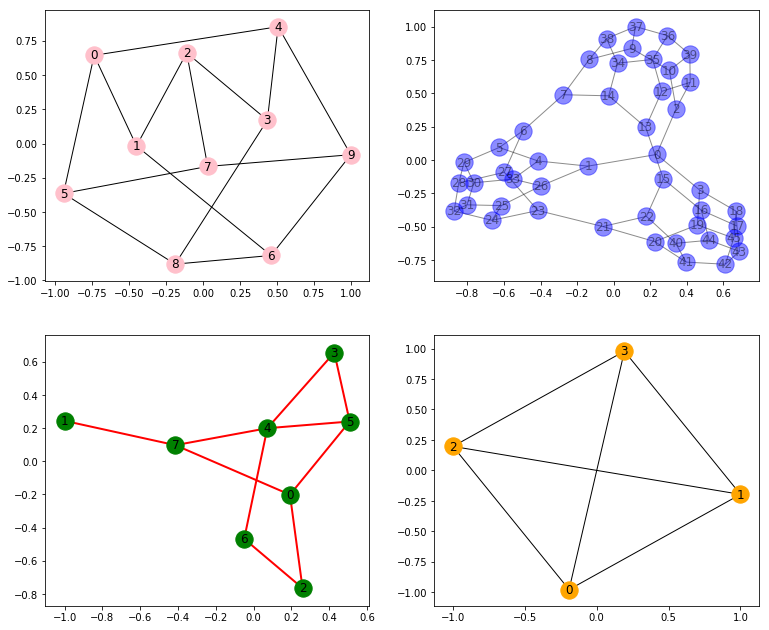

In [79]:
petersen = nx.petersen_graph()
tutte = nx.tutte_graph()
maze = nx.sedgewick_maze_graph()
tet = nx.tetrahedral_graph()

plt.figure(figsize=(12.80, 10.96))

plt.subplot(221)
nx.draw_networkx(petersen, node_color='pink')
plt.subplot(222)
nx.draw_networkx(tutte, node_color='blue', alpha=.45)
plt.subplot(223)
nx.draw_networkx(maze, node_color='green', edge_color='red', width=2)
plt.subplot(224)
nx.draw_networkx(tet, node_color='orange')

{('a', 'b'): Text(0.391611,-0.514423,'0.3'),
 ('a', 'c'): Text(0.275225,0.0621355,'2.0'),
 ('b', 'c'): Text(0.0552998,-0.423441,'0.5'),
 ('d', 'c'): Text(-0.391611,0.514423,'1.0')}

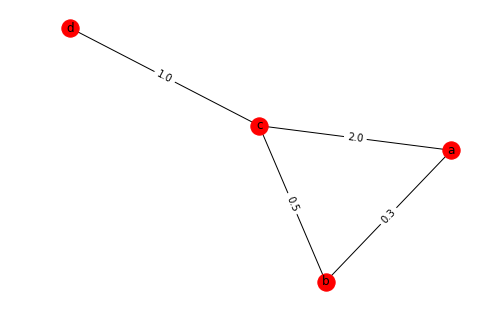

In [80]:
WG = nx.Graph()
WG.add_edge('a', 'b', weight=0.3)
WG.add_edge('b', 'c', weight=0.5)
WG.add_edge('a', 'c', weight=2.0)
WG.add_edge('c', 'd', weight=1.0)

pos = nx.fruchterman_reingold_layout(WG)
nx.draw(WG, pos=pos, with_labels=True)
nx.draw_networkx_edge_labels(WG, pos, edge_labels=nx.get_edge_attributes(WG, 'weight'))

In [81]:
nx.shortest_path(WG, 'a', 'd')

['a', 'c', 'd']

In [82]:
nx.shortest_path(WG, 'a', 'd',weight='weight')

['a', 'b', 'c', 'd']

In [83]:
nx.shortest_path_length(WG, 'a', 'd',weight='weight')

1.8

## Generic graph search algorithm

In [95]:
from copy import deepcopy

def search(graph, source):
    """ traverse the graph in linear time and yield the path """
    explored = set([source])  # initially "source" explored, all other vertices unexplored
    findable = True
    
    while findable:
        findable = False
        iterator = deepcopy(explored)  # deepcopy() takes O(n) time
        
        for u in iterator:
            for v in [v for v in graph[u] if v not in iterator]:
                explored.add(v)
                yield (u, v)
                findable = True
    
    # return # for generator functions, return is not required

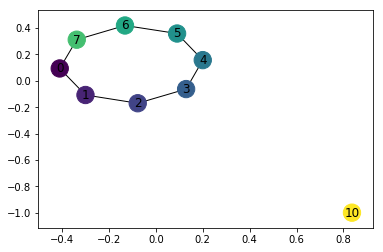

In [90]:
# for this test graph, we expect the isolated vertex 10 not to be searched
WS = nx.watts_strogatz_graph(8, 3, .25)
WS.add_node(10)

nx.draw_networkx(WS, node_color=WS.nodes())

In [120]:
G = {}
for line in nx.generate_adjlist(WS):  # Generate a single line of the graph in adjacency list format.
    print(line)
    lst = [int(v) for v in line.split()]
    G[lst[0]] = lst[1:]

print("------------------")
print("Graph in adjacency list format:")
print(G)

0 1 7
1 2
2 3
3 4
4 5
5 6
6 7
7
10
------------------
Graph in adjacency list format:
{0: [1, 7], 1: [2], 2: [3], 3: [4], 4: [5], 5: [6], 6: [7], 7: [], 10: []}


__Caveat__: be careful, this adjacency list derived from `nx.generate_adjlist()` is not symmetric as we usually see. Rather than using this function, for algorithms study in this course, we should build our own graph. Nevertheless, if we want an adjacency list for a directed graph, which should not be symmetric, this method is useful.

In [98]:
path_step = search(G, 0)
path_step

<generator object search at 0x7f7b4710e2b0>

In [102]:
next(path_step)

(0, 1)

In [103]:
next(path_step)

(0, 7)

In [104]:
next(path_step)

(1, 2)

In [105]:
next(path_step)

(2, 3)

In [106]:
next(path_step)

(3, 4)

In [107]:
next(path_step)

(4, 5)

In [108]:
next(path_step)

(5, 6)

In [109]:
next(path_step)  # StopIteration after generator exhausted

StopIteration: 

In [111]:
for step in search(G, 0):
    print(step)

(0, 1)
(0, 7)
(1, 2)
(2, 3)
(3, 4)
(4, 5)
(5, 6)


In [112]:
for step in search(G, 3):  # since the adj-list is not symmetric here, this exploration is not complete
    print(step)

(3, 4)
(4, 5)
(5, 6)
(6, 7)


In [121]:
for step in search(G, 10):  # nothing returned because vertex 10 is isolated
    print(step)

## BFS - Breadth First Search

In [137]:
# collections.deque could serve as either a stack or a queue
from collections import deque

def BFS(graph, source):
    """
    input: a graph in symmetric adjacency list, a start vertex
    output: yield a path using breadth-first search
    runtime: O(m+n) linear time
    """
    Q = deque([source])
    explored = set([source])
    
    while Q:
        u = Q.popleft()
        for v in graph[u]:
            if not v in explored:
                explored.add(v)
                Q.append(v)
                yield(u, v)
    
    # return not required for generator functions

In [133]:
# build our own graph for testing
edges = [('s','a')
        ,('s','b')
        ,('a','c')
        ,('b','c')
        ,('b','d')
        ,('c','d')
        ,('c','e')
        ,('d','e')
        ,('a','f')
        ,('c','f')
        ,('f','g')
        ,('c','g')
        ]

In [134]:
G = nx.from_edgelist(edges, create_using=nx.Graph())

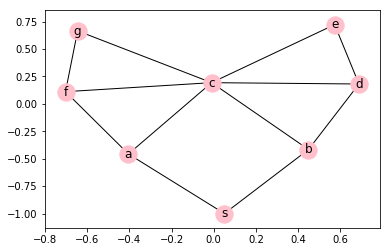

In [135]:
nx.draw_networkx(G, node_color='pink')

In [138]:
for step in BFS(G, 's'):
    print(step)

('s', 'a')
('s', 'b')
('a', 'f')
('a', 'c')
('b', 'd')
('f', 'g')
('c', 'e')


### Application: using `BFS()` to find the shortest path

This BFS-based shortest path algorithm only works for graphs whose edges are of equal length. That is, for every edge `(u,v)` in the graph, the distances between `u` and `v` are equal. If not, we have to use another one called Dijkstra's shortest path algorithm which we'll see later.

In [142]:
import numpy as np

def shortest_path(graph, source, target):
    """ Compute the shortest path from source vertex to target vertex in a graph """
    distance = {vertex:np.inf for vertex in graph.keys()}
    distance[source] = 0
    
    for (u, v) in BFS(graph, source):
        distance[v] = distance[u] + 1
    
    return distance[target]

Let's test with graph G again.

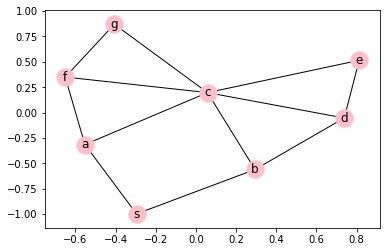

In [149]:
nx.draw_networkx(G, node_color='pink')

Manually translate G into a symmetric adjacency list.

In [151]:
adj_list = {'s': ['a','b'],
            'a': ['s','c','f'],
            'b': ['s','c','d'],
            'c': ['a','b','d','f','e','g'],
            'f': ['a','c','g'],
            'd': ['b','c','e'],
            'g': ['c','f'],
            'e': ['c','d']
           }

In [153]:
shortest_path(adj_list, 's', 'e')

3

In [154]:
shortest_path(adj_list, 's', 'c')

2

In [159]:
shortest_path(adj_list, 'e', 'a')

2

NetworkX also provides some built-in functions for calculating shortest path.

In [161]:
nx.shortest_path(G, source='e', target='a', weight=None, method='dijkstra')

['e', 'c', 'a']

In [162]:
nx.shortest_path_length(G, source='e', target='a', weight=None, method='dijkstra')

2

`nx.shortest_simple_paths()` generates all simple paths in the graph G from source to target, starting from shortest ones.

In [163]:
for step in nx.shortest_simple_paths(G, source='s', target='g'):  # generator function
    print(step)

['s', 'a', 'f', 'g']
['s', 'b', 'c', 'g']
['s', 'a', 'c', 'g']
['s', 'a', 'f', 'c', 'g']
['s', 'b', 'd', 'c', 'g']
['s', 'b', 'c', 'f', 'g']
['s', 'a', 'c', 'f', 'g']
['s', 'b', 'd', 'e', 'c', 'g']
['s', 'b', 'd', 'c', 'f', 'g']
['s', 'b', 'c', 'a', 'f', 'g']
['s', 'b', 'd', 'e', 'c', 'f', 'g']
['s', 'b', 'd', 'c', 'a', 'f', 'g']
['s', 'b', 'd', 'e', 'c', 'a', 'f', 'g']


To make the algorithm works for __weighted graphs__, just need to change one line:  
`distance[v] = distance[u] + 1`  ->  `distance[v] = distance[u] + weight(u, v)`.

In [164]:
import numpy as np

def shortest_path(graph, source, target):
    """ Compute the shortest path from source vertex to target vertex in a weighted graph """
    distance = {vertex:np.inf for vertex in graph.keys()}
    distance[source] = 0
    
    for (u, v) in BFS(graph, source):
        distance[v] = distance[u] + weight(u, v)
    
    return distance[target]

### Application: using `BFS()` to find the connected components in undirected graphs

In [187]:
from collections import deque

def undirected_CC(graph):
    """ find all connected components in an undirected graph in O(m+n) time """
    explored = set()
    CC = []
    
    def BFS(source):
        """ non-generator version of BFS, returns all traversed vertices in a list """
        nonlocal explored
        
        Q = deque([source])
        explored.add(source)
        traversed = []
        
        while Q:
            u = Q.popleft()
            traversed.append(u)
            for v in graph[u]:
                if not v in explored:
                    explored.add(v)
                    Q.append(v)
        
        return traversed
                
    for v in graph.keys():
        if not v in explored:
            CC.append(BFS(v))
    
    return CC

In [189]:
test_graph = {
    1: [3,5],
    3: [1,5],
    5: [1,3,7,9],
    7: [5],
    9: [5],
    2: [4],
    4: [2],
    6: [8,10],
    8: [6,10],
    10: [6,8]
}

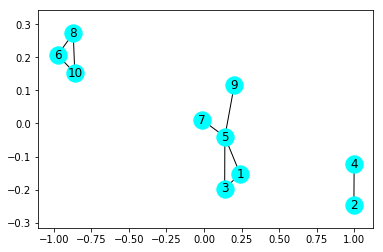

In [324]:
G = nx.from_dict_of_lists(test_graph, create_using=nx.Graph())

pos = nx.layout.fruchterman_reingold_layout(G)
nx.draw_networkx(G, node_color='aqua')

In [233]:
for cc in undirected_CC(test_graph):
    print(cc)

[1, 3, 5, 7, 9]
[2, 4]
[6, 8, 10]


## DFS - Depth First Search

In [445]:
def DFS(graph, source):
    """
    input: a graph in symmetric adjacency list, a start vertex
    output: yield a path using depth-first search in O(m+n) linear time
    """
    explored = set([source])
    stack = [source]

    while stack:
        u = stack.pop()
        for v in graph[u]:
            if v not in explored:
                explored.add(v)
                stack.append(v)
                yield (u, v)

For DFS, people usually use recursion rather than a stack.  
If you want your recursive function to be a generator, use the keyword `yield from` before a recursive call.

In [446]:
def recursive_DFS(graph, source, explored=set()):
    """ recursive version, this recursion does not need a base case """
    explored.add(source)
    
    for v in graph[source]:
        if v not in explored:
            yield (source, v)
            yield from recursive_DFS(graph, v, explored=explored)

In [447]:
adj_list = {
    'a': ['s', 'c', 'b'],
    'b': ['s', 'a', 'd'],
    'c': ['a', 'd', 'e'],
    'd': ['b', 'c', 'e', 'f'],
    'e': ['c', 'd', 'g', 'f'],
    'f': ['d', 'e', 'g'],
    'g': ['e', 'f'],
    's': ['a', 'b']
}

In [448]:
G = nx.from_dict_of_lists(adj_list, create_using=nx.Graph())

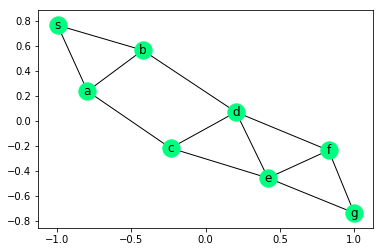

In [453]:
nx.draw_networkx(G, node_color="#00FF7F")

In [454]:
for step in DFS(adj_list, 's'):
    print(step)

('s', 'a')
('s', 'b')
('b', 'd')
('d', 'c')
('d', 'e')
('d', 'f')
('f', 'g')


In [444]:
for step in recursive_DFS(adj_list, 's'):
    print(step)

('s', 'a')
('a', 'b')
('b', 'd')
('d', 'f')
('f', 'g')
('g', 'e')
('e', 'c')


As we see in this test case, the recursive version finds the path in a more aggressive way. The reason for this is straightforward. In the stack version, aggressiveness is achieved by `stack.append()` and `stack.pop()`, however, before this operation, the program has to finish executing the __for-loop__. On the flip side, the recursive version controls aggressiveness by virtue of recursion, which takes priority over the __for-loop__.

Let's test using another graph.

In [477]:
adj_list = {
    0: [1,3,7],
    1: [0,2],
    2: [1,3],
    3: [0,2,7],
    4: [],
    5: [7,6],
    6: [5,7,8],
    7: [0,3,5,6],
    8: [6,9],
    9: [8]
}

In [478]:
G = nx.from_dict_of_lists(adj_list, create_using=nx.Graph())

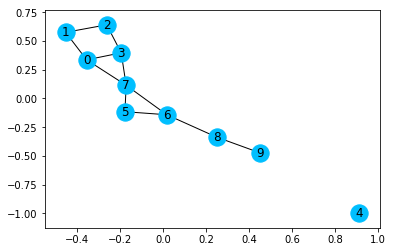

In [482]:
nx.draw_networkx(G, node_color="#00BFFF")

In [493]:
for step in DFS(adj_list, 1):
    print(step)

(1, 0)
(1, 2)
(2, 3)
(3, 7)
(7, 5)
(7, 6)
(6, 8)
(8, 9)


In [498]:
for step in recursive_DFS(adj_list, 1):
    print(step)

(1, 0)
(0, 3)
(3, 2)
(3, 7)
(7, 5)
(5, 6)
(6, 8)
(8, 9)


In [499]:
for step in recursive_DFS(adj_list, 4):  # isolated vertex yields nothing
    print(step)

### Application: using `DFS()` to find a topological sort in directed graphs
If a graph has directed cycle, there's no topological ordering.  
To find a topological ordering, first make sure that you have a __directed acyclic graph (DAG).__

The straightforward algorithm has nothing to do with `DFS()`, and runs in linear time `O(m+n)`. The basic idea is to find a sink vertex `v` which has no outgoing arcs, and then recurse on the remaining graph without `v`.

In [550]:
def topological_sort(graph, order_dict=dict()):
    """
    find a topological sort in the DAG graph 
    attention: this function mutates the input graph! make a copy before calling
    """
    # base case
    if len(graph) == 1:
        order_dict[list(graph.keys())[0]] = 1
        return order_dict
    
    for v in graph.keys():
        if len(graph[v]) == 0:  # no outgoing arcs
            sink = v
            break

    order_dict[sink] = len(graph)
        
    del graph[sink]
    for v in graph.keys():
        if sink in graph[v]:
            graph[v].remove(sink)
    
    return topological_sort(graph, order_dict)

In [520]:
D = nx.DiGraph()
D.add_path(range(4))
D.add_edge(0, 4)
D.add_edge(5, 3)
D.add_edge(5, 4)

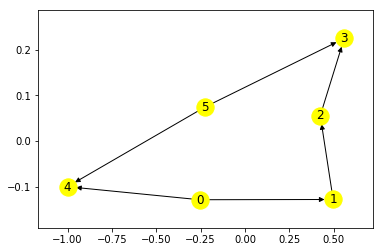

In [533]:
nx.draw_networkx(D, node_color='yellow')

As we see, 3 and 4 are both sink vertices.

In [626]:
adj_list = {}
for line in nx.generate_adjlist(D):  # not symmetric, but works for directed graphs
    print(line)
    lst = [int(v) for v in line.split()]
    adj_list[lst[0]] = lst[1:]

print("------------------")
print("Directed Graph in adjacency list format:")
print(adj_list)

0 1 4
1 2
2 3
3
4
5 3 4
------------------
Directed Graph in adjacency list format:
{0: [1, 4], 1: [2], 2: [3], 3: [], 4: [], 5: [3, 4]}


In [652]:
from copy import deepcopy

graph = deepcopy(adj_list)

ordering = topological_sort(graph)  # don't forget to copy before call
ordering

{0: 2, 1: 4, 2: 5, 3: 6, 4: 3, 5: 1}

In [654]:
sorted(ordering.items(), key=lambda x: x[1])

[(5, 1), (0, 2), (4, 3), (1, 4), (2, 5), (3, 6)]

A better and faster algorithm via `DFS()`:

In [655]:
def DFS_topological_sort(graph):
    """ topoloical sort via DFS in linear time O(m+n)"""
    explored = set()
    curr_label = len(graph)
    order_dict = {}
    
    def DFS(source):
        nonlocal explored, curr_label, order_dict
        explored.add(source)
        
        for v in graph[source]:
            if v not in explored:
                DFS(v)
        
        # when DFS() hits a sink, or backtracks, below will be executed:
        order_dict[source] = curr_label
        curr_label -= 1

    # main loop, visit each node once
    for v in graph.keys():
        if v not in explored:
            DFS(v)
            
    return order_dict

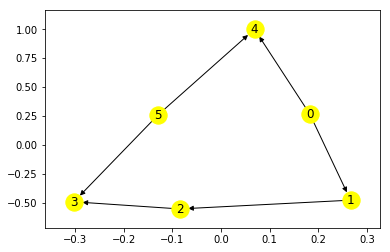

In [656]:
nx.draw_networkx(D, node_color='yellow')

In [660]:
for key, value in adj_list.items():
    print(key, ":", value)

0 : [1, 4]
1 : [2]
2 : [3]
3 : []
4 : []
5 : [3, 4]


In [661]:
graph = deepcopy(adj_list)
ordering = DFS_topological_sort(graph)

In [662]:
sorted(ordering.items(), key=lambda x: x[1])

[(5, 1), (0, 2), (4, 3), (1, 4), (2, 5), (3, 6)]

### Application: Kosaraju's 2-`DFS()`-pass algorithm for SCCs

For computing strongly connected components(SCCs) in directed graphs

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def kosaraju(graph, loop_order={}):
    """
    Compute strongly connected components or SCCs in the graph.
    
    input:  a directed graph
    output: a tuple(ft, ld) where -:
            ft: a dictionary {each node: finish time}
            ld: a dictionary {each leader: list of children nodes}
    time:   O(m + n) linear time
    remark: in the 1st pass, compute finish times "ft" of each node of the reversed graph,
            in the 2nd pass, on the original graph, find SCCs by processing nodes in decreasing order of "ft".
            in fact, the finish times here very much resemble the topological order.
            in the 1st pass, we only care about the finish time "ft" to pass to the 2nd call,
            in the 2nd pass, we only care about the leaders "ld" to find SCCs.
            
    usage:  G_rev = reverse(G)
            ft, _ = kosaraju(G_rev)             # 1st pass
            _, ld = kosaraju(G, loop_order=ft)  # 2nd pass
    """
    # initialize
    explored = set()
    t = 0     # number of nodes processed so far, or finish time
    ft = {}   # track finish times for each node
    s = None  # source node or leader for the current DFS() invocation
    ld = {}   # track leader for each node, all nodes in a SCC must share the same leader
    
    # ----------------------------- tracing function -----------------------------
    def DFS(source):
        nonlocal explored, t, ft, s, ld
        
        explored.add(source)
        ld[s].append(source)
        
        # corner case: if "source" is a sink vertex (no outgoing arcs)
        if source not in graph.keys():
            pass
        else:
            for w in graph[source]:
                if w not in explored:
                    DFS(w)
                    
        # when DFS() hits a sink or backtracks:
        t += 1          # the 1st sink node will be assigned "ft" = 1
        ft[source] = t  # then backtrack one node, "ft" = 2, and so forth...
    # ----------------------------- tracing function -----------------------------
    
    # 1st pass, loop from node n down to node 1
    if not loop_order:
        node_list = list(graph.keys())
        node_list.reverse()
    # 2nd pass, loop nodes in decreasing order of finish time
    else:
        node_list = [t[0] for t in sorted(loop_order.items(), key=lambda x: x[1], reverse=True)]
    
    # main loop
    for v in node_list:
        if v not in explored:
            s, ld[s] = v, []  # set "v" as a new leader
            DFS(v)  # start DFS search from "v"
    
    return (ft, ld)

In [11]:
edge_list = [(1,4),(4,7),(7,1),(9,7),(9,3),(6,9),(3,6),(8,6),(2,8),(5,2),(8,5)]

In [12]:
D = nx.DiGraph()
D.add_edges_from(edge_list)

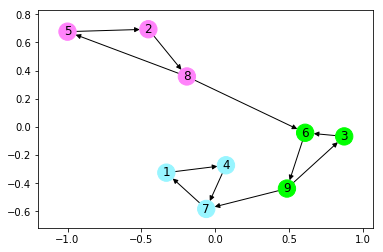

In [18]:
color = ['#98F5FF', '#FF83FA', '#00FF00'] * 3
nx.draw_networkx(D, node_color=color)

In [19]:
adj_list = {}
for line in nx.generate_adjlist(D):  # not symmetric, but works for directed graphs
    lst = [int(v) for v in line.split()]
    adj_list[lst[0]] = lst[1:]
    
print("Directed Graph in adjacency list format:")
print(adj_list)

Directed Graph in adjacency list format:
{1: [4], 2: [8], 3: [6], 4: [7], 5: [2], 6: [9], 7: [1], 8: [5, 6], 9: [3, 7]}


In [20]:
def reverse_direction(graph):
    """ returns a new graph = the original directed graph with all arcs reversed """
    rev = {}
    for node, neighbors in graph.items():
        for nbr in neighbors:
            if nbr in rev.keys():
                rev[nbr].append(node)
            else:
                rev[nbr] = [node]
    return rev

In [21]:
adj_list

{1: [4], 2: [8], 3: [6], 4: [7], 5: [2], 6: [9], 7: [1], 8: [5, 6], 9: [3, 7]}

In [22]:
reverse_direction(adj_list)

{1: [7], 2: [5], 3: [9], 4: [1], 5: [8], 6: [3, 8], 7: [4, 9], 8: [2], 9: [6]}

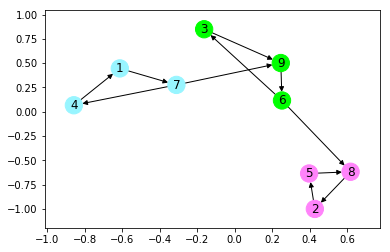

In [106]:
# this is the reversed directed graph for the 1st pass
# this graph is exactly the same as the one we saw in the slides (kosaraju.pdf page 6/19)

D_rev = nx.from_dict_of_lists(reverse_direction(adj_list), create_using=nx.DiGraph())
nx.draw_networkx(D_rev, node_color=color)

In [107]:
G, G_rev = adj_list, reverse_direction(adj_list)

In [108]:
ft, _ = kosaraju(G_rev)  # 1st pass, compute finish times
print(ft)

{1: 7, 2: 3, 3: 1, 4: 8, 5: 2, 6: 5, 7: 9, 8: 4, 9: 6}


In [109]:
_, ld = kosaraju(G, loop_order=ft)  # 2nd pass
print(ld)

{8: [8, 5, 2], 9: [9, 3, 6], 7: [7, 1, 4]}


In [110]:
SCCs = list(ld.values())
SCCs

[[8, 5, 2], [9, 3, 6], [7, 1, 4]]

### Programming Assignment on SCCs

In [ ]:
G = {}
with open("support/SCC.txt") as fh:
    for line in fh.readlines():
        lst = [int(i) for i in line.split()]
        if lst[0] not in G.keys():
            G[lst[0]] = [lst[1]]
        else:
            G[lst[0]].append(lst[1])

print(G)

If we run the cell above to read data from *.txt*, it's way too slow because this file is too large(69 MB). To work around this, let's create the graph in separate steps. In Python, list methods are faster than those for dictionaries and sets. In fact if you think about it, the reason for being so slow is that for each iteration, the I/O consumption brings additional cost, or maybe sometimes, the whole data cannot fit in memory. __For small datasets, the computer would swallow the test data whole, then access everything quickly from main memory. But for larger datasets, efficient use of I/O became dominant.__

In [111]:
U, V = [], []
with open("support/SCC.txt") as fh:
    for line in fh.readlines():
        U.append(int(line.split()[0]))
        V.append(int(line.split()[1]))

In [112]:
len(U), len(V)  # 5105043 edges in this graph!

(5105043, 5105043)

In [113]:
G = {}
for i in range(len(U)):
    if U[i] not in G.keys():
        G[U[i]] = [V[i]]
    else:
        G[U[i]].append(V[i])

In [114]:
len(G)  # 739454 nodes in this graph!

739454

In [115]:
G_rev = reverse_direction(G)

In [116]:
ft, _ = kosaraju(G_rev)
_, ld = kosaraju(G, loop_order=ft)

RecursionError: maximum recursion depth exceeded in comparison

This time we see: `RecursionError: maximum recursion depth exceeded`, this is because Python is not good at tail recursion.  
To solve this, rewrite an iterative version of `DFS()`, or use c++/Java instead of Python, or change the recursion limit:  
https://stackoverflow.com/questions/3323001/what-is-the-maximum-recursion-depth-in-python-and-how-to-increase-it

Another way to get around this is by using `threading`, according to the discussion forum. Package the functions in a single script, import the sys, threading module to set stack_size, make a `main()` function, and then run in the terminal.

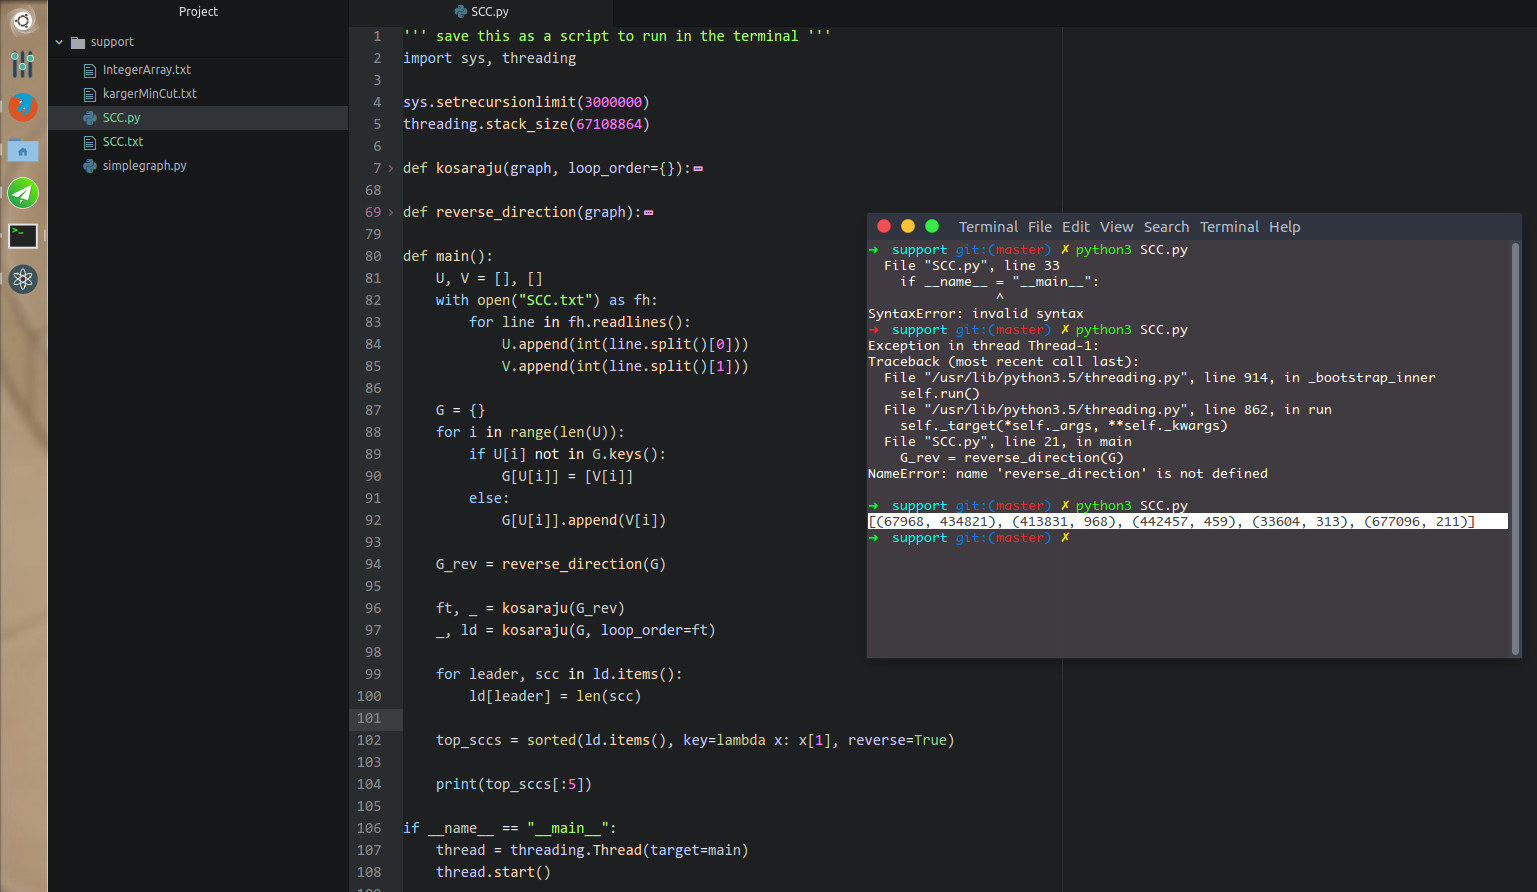

In [118]:
from IPython.display import Image
Image(filename = "/home/neo-mashiro/Pictures/Selection_001.png")

Correct Answer: Top 5 SCCs (leader, size):

In [ ]:
[(67968, 434821), (413831, 968), (442457, 459), (33604, 313), (677096, 211)]

## Dijkstra's shortest path

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

Create our test case: for weighted graph visualization, use the NetworkX built-in functions/methods to create the graph and draw it.

{('s', 'v'): Text(-0.429917,-0.380674,'1.0'),
 ('s', 'w'): Text(-0.56907,0.083623,'4.0'),
 ('t', 'v'): Text(0.56907,-0.083623,'6.0'),
 ('t', 'w'): Text(0.429917,0.380674,'3.0'),
 ('v', 'w'): Text(0.00101264,0.000376363,'2.0')}

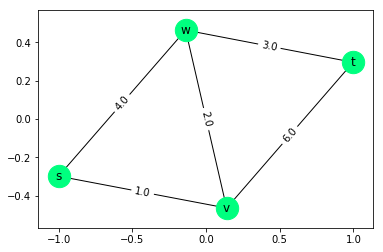

In [10]:
WG = nx.Graph()
WG.add_edge('s', 'v', length=1.0)
WG.add_edge('s', 'w', length=4.0)
WG.add_edge('v', 'w', length=2.0)
WG.add_edge('v', 't', length=6.0)
WG.add_edge('w', 't', length=3.0)

pos = nx.fruchterman_reingold_layout(WG)
nx.draw_networkx(WG, pos=pos, with_labels=True, node_color='#00FF7F', node_size=500)
nx.draw_networkx_edge_labels(WG, pos, edge_labels=nx.get_edge_attributes(WG, 'length'))

For weighted graphs, `nx.generate_adjlist()` does not work, `nx.generate_edgelist()` does generate all edge information but the format is not what we want. Therefore, it's necessary to manually build up our own adjacency list.

In [11]:
for line in nx.generate_edgelist(WG):
    print(line)

s v {'length': 1.0}
s w {'length': 4.0}
t v {'length': 6.0}
t w {'length': 3.0}
v w {'length': 2.0}


How to represent the adjacency list of a weighted graph? -- __use dict of dict__

In [12]:
graph = {
    's': {'v': 1, 'w': 4},
    'v': {'w': 2, 't': 6},
    'w': {'t': 3},
    't': {}
}

In [13]:
def dijkstra(graph, source):
    """
    Compute the shortest path from source to each vertex in the graph.
    
    input:  a weighted graph(a dict of dict), a source vertex
    output: a tuple of 2 dictionaries (SD, SP), where SD = {shortest distance}, SP = {shortest path}
    time:   O(m*n)
    remark: this algorithm applies to both directed and undirected graphs.
            each edge in the graph must have non-negative length/distance.
            * if use "while findable" to control when to end the loop, this works for all graphs.
            * if use "while len(X) < len(graph)", this only works for connected graphs.
    """
    findable = True
    
    X = [source]  # keep track of vertices processed so far
    SD = {}  # shortest distance
    SP = {}  # shortest path
    SD[source] = 0
    SP[source] = [source]
    
    while findable:  # unfindable/isolated nodes will have an empty distance and empty path
        
        findable = False
        min_score = np.inf
        min_edge = None
        
        # among all crossing edges choose the one with the smallest Dijkstra's greedy score
        for v in graph:
            for w in graph[v]:
                if v in X and w not in X:
                    findable = True
                    D_score = SD[v] + graph[v][w]
                    if D_score < min_score:
                        min_score = D_score
                        min_edge = (v, w)
        
        if findable:
            v, w = min_edge[0], min_edge[1]
            '''
            print("---- step debug ----")
            print("min_edge:", v, w)
            print("min_score:", min_score, "\n")
            '''
            X.append(w)
            SD[w] = min_score
            SP[w] = SP[v] + [w]
    
    return (SD, SP)

{('s', 'v'): Text(-0.429917,-0.380674,'1.0'),
 ('s', 'w'): Text(-0.56907,0.083623,'4.0'),
 ('t', 'v'): Text(0.56907,-0.083623,'6.0'),
 ('t', 'w'): Text(0.429917,0.380674,'3.0'),
 ('v', 'w'): Text(0.00101264,0.000376363,'2.0')}

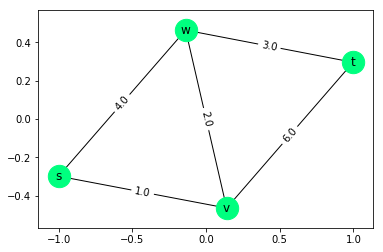

In [20]:
nx.draw_networkx(WG, pos=pos, with_labels=True, node_color='#00FF7F', node_size=500)
nx.draw_networkx_edge_labels(WG, pos, edge_labels=nx.get_edge_attributes(WG, 'length'))

In [21]:
shortest_dist, shortest_path = dijkstra(graph, 's')

In [22]:
shortest_dist

{'s': 0, 't': 6, 'v': 1, 'w': 3}

In [23]:
shortest_path

{'s': ['s'], 't': ['s', 'v', 'w', 't'], 'v': ['s', 'v'], 'w': ['s', 'v', 'w']}

### Programming assignment on Dijkstra's Shortest Path

In [24]:
G = {}
with open("support/dijkstraData.txt", 'rt') as fh:
    for line in fh.readlines():
        lst = line.strip().split()
        source = int(lst[0])
        target = {}
        for pair in lst[1:]:
            pair = pair.split(',')
            target[int(pair[0])] = int(pair[1])
        G[source] = target
        
print(G[10])

{96: 807, 11: 8988, 164: 3866, 7: 2904, 168: 9495, 137: 5273, 135: 4650, 78: 3771, 88: 2539, 51: 5578, 116: 1493, 171: 2029, 184: 3207, 57: 9988, 187: 4786, 62: 4816, 31: 1184}


Now let's calculate the shortest distance from 1 to this list of nodes: `[7,37,59,82,99,115,133,165,188,197]`

In [25]:
shortest_dist, shortest_path = dijkstra(G, 1)

In [26]:
# Correct Answer: (Confirmed)
for tar in [7,37,59,82,99,115,133,165,188,197]:
    print("shortest distance from 1 to", str(tar).ljust(3," "), "=", shortest_dist[tar])

shortest distance from 1 to 7   = 2599
shortest distance from 1 to 37  = 2610
shortest distance from 1 to 59  = 2947
shortest distance from 1 to 82  = 2052
shortest distance from 1 to 99  = 2367
shortest distance from 1 to 115 = 2399
shortest distance from 1 to 133 = 2029
shortest distance from 1 to 165 = 2442
shortest distance from 1 to 188 = 2505
shortest distance from 1 to 197 = 3068


## Heap/Priority Queue data structure

https://docs.python.org/3/library/heapq.html

In Python standard library, the `heapq` module provides an implementation of the heap queue data structure, which is based on a zero-indexed array/list. `heap[0]` is the smallest item, and for every item, `heap[k] <= heap[2*k+1]`, which is the left child, and `heap[k] <= heap[2*k+2]`, which is the right child.  

When do we use a heap? You'd use a heap if you are only interested in the smallest value, or the first n smallest values, especially if you are interested in those values on an ongoing basis.

### Basic properties

build a heap from an iterable

In [27]:
import heapq as hq

In [28]:
heap = [3,7,5,11,8,0,4,6,1,9,10,2,12,13]

In [29]:
hq.heapify(heap)  # convert in-place, in linear time

In [30]:
def visual_heap(heap):
    ''' a quick overview of small heaps '''
    index = 0  # index of the next item to print
    count = 0  # row number
    
    while index < len(heap):
        step = 2 ** count
        row = heap[index:(index + step)]
        print(str(row).center(20))
        count += 1
        index += step
    
    return

In [31]:
visual_heap(heap)

        [0]         
       [1, 2]       
    [6, 8, 3, 4]    
[7, 11, 9, 10, 5, 12, 13]


`heappush(), heappop(), nlargest(), nsmallest()`

In [32]:
hq.heappush(heap, 3)
visual_heap(heap)

        [0]         
       [1, 2]       
    [6, 8, 3, 3]    
[7, 11, 9, 10, 5, 12, 13, 4]


In [33]:
min_item = hq.heappop(heap)
min_item

0

In [34]:
visual_heap(heap)

        [1]         
       [4, 2]       
    [6, 8, 3, 3]    
[7, 11, 9, 10, 5, 12, 13]


In [35]:
import random

l = list(range(10))
random.shuffle(l)

In [36]:
l

[9, 7, 8, 3, 0, 1, 5, 4, 6, 2]

In [37]:
hq.nlargest(3, l)  # desc

[9, 8, 7]

In [38]:
hq.nsmallest(2, l)  # asc

[0, 1]

convert a heap into a sorted list

In [39]:
def heapsort(heap):
    ''' note: this function mutates the input heap '''
    return [hq.heappop(heap) for _ in range(len(heap))]

In [40]:
visual_heap(heap)

        [1]         
       [4, 2]       
    [6, 8, 3, 3]    
[7, 11, 9, 10, 5, 12, 13]


In [41]:
heapsort(heap)

[1, 2, 3, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [ ]:
sorted(heap)  # this is faster

### What about a max heap?

The Python STL only supports the min heap, what if we need a max heap? It's not trivial to write a MaxHeap class(pretty easy but still takes time), but there's __a trick__. If we add a minus sign `-` to every key in a min heap, that makes it "negative", then `(-1) * hq.heappop()` will pop up the maximum. (if `-x` is the smallest, `x` must be the largest). The programming assignment below is a good example of a max heap. The trick is simple: each time you `heappush()/heappop()/heapify()`, multiply all keys by `-1`.

In fact, the `heapq` module already have functions to support a Max-Heap:  

`hq._heappop_max()`  
`hq._heapreplace_max()`  
`hq._heapify_max()`  
`hq._siftdown_max()`  
`hq._siftup_max()`  

However, __DO NOT USE__ them because they are broken and not maintained at all! Min heaps should be more than enough for your application, as you can always convert a maximum-problem to a minimum-problem with ease.

### Programming assignment: Median Maintenance using Max+Min Heaps

The goal of this problem is to implement the "Median Maintenance" algorithm (covered in the Week 5 lecture on heap applications). The text file contains a list of the integers from 1 to 10000 in unsorted order; you should treat this as a stream of numbers, arriving one by one, and each time you should compute the current median. What's the sum of these 10,000 medians, modulo 10,000? (i.e., only the last 4 digits).

In [2]:
import heapq as hq

In [3]:
stream = []
with open("support/Median.txt", "rt") as fh:
    for line in fh.readlines():
        stream.append(int(line))

In [4]:
# initialize two heaps
a = stream.pop(0)
b = stream.pop(0)

max_H = [(-1) * min(a, b)]  # times (-1) to make a Max Heap
min_H = [max(a, b)]

total = a + min(a, b)

In [5]:
while stream:
    # simulate a stream of data coming in
    num = stream.pop(0)
    
    if num > (-1) * max_H[0]:
        hq.heappush(min_H, num)
    else:
        hq.heappush(max_H, (-1) * num)
        
    if abs(len(max_H) - len(min_H)) > 1:
        if len(max_H) > len(min_H):
            hq.heappush(min_H, (-1) * hq.heappop(max_H))
        else:
            hq.heappush(max_H, (-1) * hq.heappop(min_H))
    
    if len(max_H) >= len(min_H):
        median = (-1) * max_H[0]
    else:
        median = min_H[0]
        
    total += median

In [6]:
total % 10000  # correct answer (confirmed)

1213

### work with tuples in a heap - the 1st element in the tuple should be the key

In [42]:
h = []

hq.heappush(h, (5, 'v1', 'v2'))  # tuple = (key of node, node_attr_1, node_attr_2, ....)
hq.heappush(h, (7, 'v3', 'v4'))  # tuple[0] is the node key, can be followed by as many other info as you want
hq.heappush(h, (1, 'v5', 'v6'))
hq.heappush(h, (3, 'v7', 'v8'))

hq.heappop(h)

(1, 'v5', 'v6')

In [43]:
h  # in this case, the heap is a list of tuples

[(3, 'v7', 'v8'), (7, 'v3', 'v4'), (5, 'v1', 'v2')]

### Self-implemented Max Heap Class

In [14]:
from math import floor, log

class MaxHeap:
    ''' 0-based indices of nodes, implemented as an array '''
    def __init__(self, keys):
        self._heap = keys
        self._size = len(keys)
        self.heapify()
        
    def __str__(self):
        return str(self._heap) + "\n" + "size: " + str(self.size)

    @property
    def size(self):
        return self._size

    @staticmethod
    def parent(node):  # no "self" argument for static methods
        return floor(0.5 * (node - 1)) if node > 0 else None

    def l_child(self, node):  # not static, to derive child, must depend on an instance
        return (2 * node + 1) if (2 * node + 1) < self._size else None

    def r_child(self, node):  # any non-root node always has a parent, but not all nodes have children
        return (2 * node + 2) if (2 * node + 2) < self._size else None

    def _siftup(self, node):  # iterative version (recursion also works)
        ''' nothing would happen if the heap property is already maintained '''
        while node > 0 and self._heap[node] > self._heap[MaxHeap.parent(node)]:
            parent = MaxHeap.parent(node)
            self._heap[node], self._heap[parent] = self._heap[parent], self._heap[node]
            node = parent

    def _siftdown(self, node):  # recursive version (iteration also works)
        ''' nothing would happen if the heap property is already maintained '''
        l, r = self.l_child(node), self.r_child(node)
        max_node, max_key = node, self._heap[node]
        if l and self._heap[l] > max_key:
            max_node, max_key = l, self._heap[l]
        if r and self._heap[r] > max_key:
            max_node, max_key = r, self._heap[r]
        if node != max_node:
            self._heap[node], self._heap[max_node] = self._heap[max_node], self._heap[node]
            self._siftdown(max_node)

    def heapify(self):
        ''' heapify in-place, no additional space used, takes O(nlogn) time.
            iterate thru nodes 1 by 1 from bottom to top (except the leaves), _siftdown() to repair the heap property.
            this is just a naive implementation, in heapq, the in-place heapify() only takes O(n) linear time.
        '''
        for node in range(self.size - 1, -1, -1):  # from node(n - 1) to node(0)
            self._siftdown(node)

    def extract_max(self):
        if self._size == 0:
            raise Exception("Heap underflow!")
        maximum = self._heap[0]
        self._heap[0] = self._heap[-1]
        self._heap.pop()
        self._size -= 1
        if self._size != 0:
            self._siftdown(0)
        return maximum

    def push(self, key):
        self._heap.append(key)
        self._size += 1
        self._siftup(self._size - 1)

    def remove(self, node):
        self._heap[node] = self._heap[-1]
        self._heap.pop()
        self._size -= 1
        self._siftup(node)
        self._siftdown(node)

    def set_key(self, node, key):
        self._heap[node] = key
        self._siftup(node)
        self._siftdown(node)

- __Unit Test__

In [16]:
H = MaxHeap(list(np.random.randint(0, 100, 20)))
print(H)

[83, 73, 58, 52, 68, 49, 38, 35, 38, 22, 53, 23, 26, 20, 25, 34, 35, 0, 13, 4]
size: 20


In [17]:
for _ in range(15):
    print(H.extract_max(), end=" ")

83 73 68 58 53 52 49 38 38 35 35 34 26 25 23 

In [18]:
print(H)

[22, 20, 4, 0, 13]
size: 5


In [19]:
H.remove(2)  # 0-based node indices
print(H)

[22, 20, 13, 0]
size: 4


In [20]:
H.remove(1)
print(H)

[22, 0, 13]
size: 3


In [21]:
H.set_key(1, 10)
print(H)

[22, 10, 13]
size: 3


In [22]:
for key in [1, 10, 20, 30, 40, 50, 60, 70, 80, 90]:
    H.push(key)

In [23]:
print(H)

[90, 60, 80, 30, 50, 70, 20, 1, 10, 10, 40, 13, 22]
size: 13


In [24]:
for _ in range(12):
    print(H.extract_max(), end=" ")

90 80 70 60 50 40 30 22 20 13 10 10 

In [25]:
print(H)

[1]
size: 1


In [26]:
H.extract_max()

1

In [27]:
H.extract_max()  # heap underflow!

Exception: Heap underflow!

- __Stress Test__

In [15]:
import heapq as hq
import numpy as np

def stress_test(scale=1000):
    
    for _ in range(scale):
        arr = list(np.random.randint(0, 100, 20))
        max_heap = list(np.dot(arr.copy(), -1))
        hq.heapify(max_heap)
        tst_heap = MaxHeap(arr.copy())
        
        for _ in range(10):
            assert hq.heappop(max_heap) * (-1) == tst_heap.extract_max(), "check heapify(), extract_max()!"
        
        for key in np.random.randint(0, 100, 10):
            hq.heappush(max_heap, -key)
            tst_heap.push(key)
            
        assert len(max_heap) == tst_heap.size, "check heap size!"
        
        for _ in range(tst_heap.size):
            assert hq.heappop(max_heap) * (-1) == tst_heap.extract_max(), "check extract_max()"
            
    print(scale, "tests passed!")

In [96]:
stress_test()

1000 tests passed!


In [97]:
stress_test(10000)

10000 tests passed!


### Self-implemented Min Heap Class

This is just the opposite of a Max Heap Class

In [1]:
from math import floor, log

class MinHeap:
    ''' 0-based indices of nodes, implemented as an array '''
    def __init__(self, keys):
        self._heap = keys
        self._size = len(keys)
        self.heapify()

    def __str__(self):
        return str(self._heap) + "\n" + "size: " + str(self.size)

    @property
    def size(self):
        return self._size

    @staticmethod
    def parent(node):  # no "self" argument for static methods
        return floor(0.5 * (node - 1)) if node > 0 else None

    def l_child(self, node):  # not static, to derive child, must depend on an instance
        return (2 * node + 1) if (2 * node + 1) < self._size else None

    def r_child(self, node):  # any non-root node always has a parent, but not all nodes have children
        return (2 * node + 2) if (2 * node + 2) < self._size else None

    def _siftup(self, node):  # iterative version (recursion also works)
        ''' nothing would happen if the heap property is already maintained '''
        while node > 0 and self._heap[node] < self._heap[MinHeap.parent(node)]:
            parent = MinHeap.parent(node)
            self._heap[node], self._heap[parent] = self._heap[parent], self._heap[node]
            node = parent

    def _siftdown(self, node):  # recursive version (iteration also works)
        ''' nothing would happen if the heap property is already maintained '''
        l, r = self.l_child(node), self.r_child(node)
        min_node, min_key = node, self._heap[node]
        if l and self._heap[l] < min_key:
            min_node, min_key = l, self._heap[l]
        if r and self._heap[r] < min_key:
            min_node, min_key = r, self._heap[r]
        if node != min_node:
            self._heap[node], self._heap[min_node] = self._heap[min_node], self._heap[node]
            self._siftdown(min_node)

    def heapify(self):
        ''' heapify in-place, no additional space used, takes O(nlogn) time.
            iterate thru nodes 1 by 1 from bottom to top (except the leaves), _siftdown() to repair the heap property.
            this is just a naive implementation, in heapq, the in-place heapify() only takes O(n) linear time.
        '''
        for node in range(self.size - 1, -1, -1):  # from node(n - 1) to node(0)
            self._siftdown(node)

    def extract_min(self):
        if self._size == 0:
            raise Exception("Heap underflow!")
        minimum = self._heap[0]
        self._heap[0] = self._heap[-1]
        self._heap.pop()
        self._size -= 1
        if self._size != 0:
            self._siftdown(0)
        return minimum

    def push(self, key):
        self._heap.append(key)
        self._size += 1
        self._siftup(self._size - 1)

    def remove(self, node):
        self._heap[node] = self._heap[-1]
        self._heap.pop()
        self._size -= 1
        self._siftup(node)
        self._siftdown(node)

    def set_key(self, node, key):
        self._heap[node] = key
        self._siftup(node)
        self._siftdown(node)

## Accelerate Dijkstra's Algorithm using a min heap

In [82]:
import numpy as np
import heapq as hq
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

__Note:__ to implement this algorithm using heaps, we need ability to delete from middle of heap. This is how to do it:  
https://stackoverflow.com/questions/10162679/python-delete-element-from-heap

In [83]:
''' helper functions to implement this algorithm '''

def search_node(heap, node):
    ''' where is the node in the heap? '''
    index = 0
    for item in heap:
        if item[2] == node:  # tuple[2] is the end node
            return (item[0], item[1], item[2], index)
        index += 1
    return

def remove_node(heap, node):
    ''' remove a node from the heap in linear time '''
    _, _, _, index = search_node(heap, node)  # 1.find the node's position in the list
    heap[index] = heap[-1]                    # 2.swap with the last element
    heap.pop()                                # 3.remove the last element (list.pop())
    hq.heapify(heap)                          # 4.rearrange the heap

`Assert` versus `Exception`:  

https://stackoverflow.com/questions/944592/best-practice-for-python-assert

Asserts should be used to test conditions that __should never happen__. The purpose is to crash early in the case of a corrupt program state.

Exceptions should be used for errors that can conceivably happen, and you should almost always create your own Exception classes.

In [84]:
def dijkstra_heap(graph, source):
    """
    input:  a weighted graph, a source vertex
    output: a tuple of 2 dictionaries (SD, SP), where SD = {shortest distance}, SP = {shortest path}
    time:   O(m*log(n)), this is much faster than O(m*n)
    """
    X = [source]  # keep track of vertices processed so far
    
    SD = {}  # shortest distance
    SD[source] = 0
    
    SP = {}  # shortest path
    SP[source] = [source]
    
    # initialize the heap
    H = []
    
    for w in [w for w in graph if w not in X]:
        
        # run local tournament for each node w in V - X
        min_score = np.inf
        winner = None
        
        for v in graph:
            if v in X and w in graph[v]:
                D_score = SD[v] + graph[v][w]
                
                if D_score < min_score:
                    min_score = D_score
                    winner = (v, w)
                        
        if winner:
            v, w = winner
            hq.heappush(H, (min_score, v, w))  # "w" is unique across the heap
        else:
            hq.heappush(H, (np.inf, None, w))  # for isolated nodes, key = infinity
    
    assert len(H) == (len(graph) - len(X)), "Initialized heap is not complete!"
    
    
    # main loop
    while len(H) > 0:  # unfindable/isolated nodes will have an infinity distance and [] path
        
        # among all vertices in the heap H = V - X, pop H[0] and add to X
        D_score, v, w = hq.heappop(H)
        X.append(w)
        SD[w] = D_score
        SP[w] = SP[v] + [w]
        '''
        print("---- step debug ----")
        print("Best edge:", v, w)
        print("D-score:", D_score, "\n")
        '''
        # last, may need to update keys for nodes in graph[w]
        for t in graph[w]:
            if t not in X:
                
                new_score = SD[w] + graph[w][t]
                score, _, _, _ = search_node(H, t)
                
                if new_score < score:
                    remove_node(H, t)
                    hq.heappush(H, (new_score, w, t))

    return (SD, SP)

In [85]:
G = {}
with open("support/dijkstraData.txt", 'rt') as fh:
    for line in fh.readlines():
        lst = line.strip().split()
        source = int(lst[0])
        target = {}
        for pair in lst[1:]:
            pair = pair.split(',')
            target[int(pair[0])] = int(pair[1])
        G[source] = target
        
print(G[10])

{96: 807, 11: 8988, 164: 3866, 7: 2904, 168: 9495, 137: 5273, 135: 4650, 78: 3771, 88: 2539, 51: 5578, 116: 1493, 171: 2029, 184: 3207, 57: 9988, 187: 4786, 62: 4816, 31: 1184}


In [86]:
shortest_dist, shortest_path = dijkstra_heap(G, 1)

In [87]:
for tar in [7,37,59,82,99,115,133,165,188,197]:
    print("shortest distance from 1 to", str(tar).ljust(3," "), "=", shortest_dist[tar])

shortest distance from 1 to 7   = 2599
shortest distance from 1 to 37  = 2610
shortest distance from 1 to 59  = 2947
shortest distance from 1 to 82  = 2052
shortest distance from 1 to 99  = 2367
shortest distance from 1 to 115 = 2399
shortest distance from 1 to 133 = 2029
shortest distance from 1 to 165 = 2442
shortest distance from 1 to 188 = 2505
shortest distance from 1 to 197 = 3068


Results are exactly the same as we computed before! Correctness proved! :)

## Balanced Search Trees, Red-Black Trees, AVL, B, B+ Trees...

It's not necessary to implement and memorize every detail about these data structures, but you need to have a complete visualization of them in your mind. For when and how to use them in your own work, read some advanced materials or textbooks to get an in-depth understanding.

__READ THIS ANSWER:__

https://www.quora.com/How-do-I-strengthen-my-knowledge-of-data-structures-and-algorithms-Both-have-left-me-with-a-fractured-knowledge-of-the-subject-with-lots-of-gaps-in-between-What-would-be-a-good-way-to-go-about-filling-the-gaps-and-making-progress/answer/Robert-Love-1

In [ ]:
BEST_algorithm_textbook = sys.path('../textbooks/Introduction to Algorithms Third Edition.pdf')

For details read the textbook. In most cases you only need to use Python `dict()` and `set()`, which themselves are probably advanced binary search trees. If you do encounter a case in which you need even better performance, there's no appropriate third-party libraries designed for you but you have to write one from scratch to meet your specific requirements. Here I'm just going to code up a general skeleton of the `BinarySearchTree` Class.

### Self-implemented BST Class

In [61]:
class Node:
    ''' for ties, values of different items with the same key are stored in one list,
        this way, there would be no duplicate keys in the search tree, all keys are distinct.
    '''
    def __init__(self, key, value, parent=None, l_child=None, r_child=None):
        self.key = key
        self.value = [value]  # values of tied items in a list
        self.parent = parent
        self.l_child = l_child  # l_child.key < self.key
        self.r_child = r_child  # r_child.key > self.key
        l_rank = (l_child.rank if l_child else 0)
        r_rank = (r_child.rank if r_child else 0)
        self.rank = l_rank + r_rank + 1  # total number of nodes in subtree rooted at self

    def __str__(self):
        return ', '.join(['key:' + str(self.key), 'value:' + str(self.value), 'rank:' + str(self.rank)])
    
    __repr__ = __str__

    def is_l_child(self):
        return self.parent != None and self.parent.l_child == self

    def is_r_child(self):
        return self.parent != None and self.parent.r_child == self

    def is_root(self):
        return not self.parent

    def is_leaf(self):
        return not (self.l_child or self.r_child)

    def is_complete(self):
        return (self.l_child != None and self.r_child != None)

In [387]:
class BinarySearchTree:

    def __init__(self, root):
        self.root = root  # a root node object uniquely defines a tree/subtree

    def __len__(self):
        return self.root.rank

    def __str__(self):
        output = ''
        for node in self:
            output += (str(node.key) + ":" + str(node.value) + '\n')
        return output

    def __iter__(self):  # this is also in-order traversal
        if self.root.l_child:
            for node in BinarySearchTree(self.root.l_child):
                yield node
        yield self.root
        if self.root.r_child:
            for node in BinarySearchTree(self.root.r_child):
                yield node

    def __contains__(self, key):
        return self.find(key)[0]

    def depth(self):
        ''' maximum number of layers underground (ground = layer 0) '''
        from collections import deque
        Q = deque([self.root])
        layer = {self.root: 1}
        while Q:
            node = Q.popleft()
            if node.l_child:
                layer[node.l_child] = layer[node] + 1
                Q.append(node.l_child)
            if node.r_child:
                layer[node.r_child] = layer[node] + 1
                Q.append(node.r_child)
        return max(layer.values())

    def _l_parent(self, node):
        ''' return the closest left ancestor '''
        if not node.parent:
            return None
        if node.key < node.parent.key:
            return self._l_parent(node.parent)
        else:
            return node.parent

    def _r_parent(self, node):
        ''' return the closest right ancestor '''
        if not node.parent:
            return None
        if node.key > node.parent.key:
            return self._r_parent(node.parent)
        else:
            return node.parent

    def min(self):
        min_node = self.root
        while min_node.l_child:
            min_node = min_node.l_child
        return min_node

    def max(self):
        max_node = self.root
        while max_node.r_child:
            max_node = max_node.r_child
        return max_node

    def predecessor(self, node):
        ''' return the node in the tree with the last largest key '''
        if node.l_child:
            return BinarySearchTree(node.l_child).max()
        else:
            return self._l_parent(node)

    def successor(self, node):
        ''' return the node in the tree with the next largest key '''
        if node.r_child:
            return BinarySearchTree(node.r_child).min()
        else:
            return self._r_parent(node)

    def find(self, key):
        # if key was found, return (True, node with that key)
        # if key not found, return (False, parent of that missing node)
        if key == self.root.key:
            return (True, self.root)
        elif key < self.root.key:
            if self.root.l_child:
                return BinarySearchTree(self.root.l_child).find(key)
            else:
                return (False, self.root)
        else:
            if self.root.r_child:
                return BinarySearchTree(self.root.r_child).find(key)
            else:
                return (False, self.root)

    def range_search(self, lower, upper):
        ''' find a list of nodes with key between [lower, upper] inclusive '''
        found, curr_node = self.find(lower)
        L = []
        while curr_node and curr_node.key <= upper:
            if curr_node.key >= lower:
                L.append(curr_node)
            curr_node = self.successor(curr_node)
        return L

    def order_statistic(self, i):
        ''' return the i-th order statistic from the tree (0-based index i) '''
        l_rank = self.root.l_child.rank if self.root.l_child else 0
        r_rank = self.root.r_child.rank if self.root.r_child else 0
        if l_rank == i:
            return self.root.key
        elif l_rank > i:
            return BinarySearchTree(self.root.l_child).order_statistic(i)
        else:
            return BinarySearchTree(self.root.r_child).order_statistic(i - l_rank - 1)

    @staticmethod
    def _update_rank(node, num):
        curr_node = node
        while curr_node:
            curr_node.rank += num
            curr_node = curr_node.parent

    def insert(self, key, value):
        found, node = self.find(key)
        if found:
            node.value.append(value)
        else:
            new_node = Node(key, value, parent=node)  # newly-created node has rank=1
            if key < node.key:
                node.l_child = new_node
            else:
                node.r_child = new_node
            BinarySearchTree._update_rank(node, +1)

    def _del_leaf(self, leaf):
        parent = leaf.parent
        BinarySearchTree._update_rank(parent, -1)
        if leaf.is_l_child():
            parent.l_child = None
        else:
            parent.r_child = None
        leaf.parent = None

    def _del_node_with_one_child(self, node):
        parent = node.parent
        child = (node.l_child or node.r_child)
        BinarySearchTree._update_rank(parent, -1)
        child.parent = parent
        if node.is_l_child():
            parent.l_child = child
        else:
            parent.r_child = child
        node.parent, node.l_child, node.r_child = None, None, None

    @staticmethod
    def _swap(node1, node2):
        node1.key, node2.key = node2.key, node1.key
        node1.value, node2.value = node2.value, node1.value

    def delete(self, key, value=None):
        ''' if value != None, delete value from the node, otherwise, delete the entire node as follows:
            case 1: if node has no children, just remove it from the tree
            case 2: if node has only 1 child, replace node with the child (child inherits the node's position)
            case 3: if node has both children, predecessor and successor must be its descendant, not ancestors.
                    so, swap the node with its predecessor or successor, then in its new position, the node
                    must have no right or left child, so we can delete it as in case 1 or case 2.
        '''
        found, node = self.find(key)
        if not found:
            return
        if value:
            node.value.remove(value)
        else:
            if node.is_leaf():
                self._del_leaf(node)
            elif not node.is_complete():
                self._del_node_with_one_child(node)
            else:
                pred = self.predecessor(node)  # here we use predecessor, but successor works as well
                BinarySearchTree._swap(node, pred)  # only swap key and value
                if pred.r_child:
                    raise AttributeError('predecessor cannot have right child!')
                if pred.l_child:
                    self._del_node_with_one_child(pred)
                else:
                    self._del_leaf(pred)

    def l_rotate(self, Y):
        # swap Y and its right child X (rotate left) while maintaining the BST invariant
        P = Y.parent
        X = Y.r_child
        B = X.l_child
        X.parent = P
        if Y.is_l_child():
            P.l_child = X
        elif Y.is_r_child():
            P.r_child = X
        Y.parent = X
        X.l_child = Y
        B.parent = Y
        Y.r_child = B

    def r_rotate(self, X):
        # swap X and its left child Y (rotate right) while maintaining the BST invariant
        P = X.parent
        Y = X.l_child
        B = Y.r_child
        Y.parent = P
        if X.is_l_child():
            P.l_child = Y
        elif X.is_r_child():
            P.r_child = Y
        X.parent = Y
        Y.r_child = X
        B.parent = X
        X.l_child = B

In [474]:
import random
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import pygraphviz
from networkx.drawing.nx_agraph import write_dot, graphviz_layout

def draw_tree(tree):
    adj_list = {node.key:[] for node in tree}
    for node in tree:
        if node.l_child:
            adj_list[node.key].append(node.l_child.key)
        if node.r_child:
            adj_list[node.key].append(node.r_child.key)
    G = nx.DiGraph(adj_list)
    plt.title('Binary Search Tree', fontsize=16)
    pos = graphviz_layout(G, prog='dot')
    nx.draw_networkx(G, pos, with_labels=True, arrows=True, node_color="lightgreen")
    nx.draw_networkx_nodes(G, pos, nodelist=[tree.root.key], node_color="#E066FF", node_size=1000)

 - __Unit Test__

In [811]:
root = Node(50, "Alice")
T = BinarySearchTree(root)

In [812]:
T.insert(random.randint(0,100), "Bob")
T.insert(random.randint(0,100), "Cathy")
T.insert(random.randint(0,100), "Jacky")
T.insert(random.randint(0,100), "Mevis")
T.insert(random.randint(0,100), "Glass")
T.insert(random.randint(0,100), "William")

In [813]:
print(T)

2:['Glass']
32:['William']
50:['Alice']
74:['Jacky']
75:['Bob']
95:['Cathy']
97:['Mevis']



2:['Glass']
32:['William']
50:['Alice', 'CYY', 'Mashiro']
74:['Jacky']
75:['Bob']
95:['Cathy']
97:['Mevis']



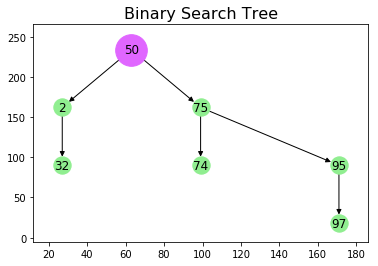

In [814]:
T.insert(50, "CYY")
T.insert(50, "Mashiro")
print(T)
draw_tree(T)

In [815]:
keys = []
for node in T:
    keys.append(node.key)
    print(node)

key:2, value:['Glass'], rank:2
key:32, value:['William'], rank:1
key:50, value:['Alice', 'CYY', 'Mashiro'], rank:7
key:74, value:['Jacky'], rank:1
key:75, value:['Bob'], rank:4
key:95, value:['Cathy'], rank:2
key:97, value:['Mevis'], rank:1


In [817]:
len(T)

7

In [818]:
for key in keys:
    found, node = T.find(key)
    print(found, '-------', node)

True ------- key:2, value:['Glass'], rank:2
True ------- key:32, value:['William'], rank:1
True ------- key:50, value:['Alice', 'CYY', 'Mashiro'], rank:7
True ------- key:74, value:['Jacky'], rank:1
True ------- key:75, value:['Bob'], rank:4
True ------- key:95, value:['Cathy'], rank:2
True ------- key:97, value:['Mevis'], rank:1


In [819]:
T.find(100)

(False, key:97, value:['Mevis'], rank:1)

In [820]:
T.find(60)

(False, key:74, value:['Jacky'], rank:1)

In [821]:
T.find(8)

(False, key:32, value:['William'], rank:1)

In [822]:
for node in T.range_search(32, 75):
    print(node)

key:32, value:['William'], rank:1
key:50, value:['Alice', 'CYY', 'Mashiro'], rank:7
key:74, value:['Jacky'], rank:1
key:75, value:['Bob'], rank:4


In [823]:
for node in T.range_search(-99999, 99999):
    print(node)

key:2, value:['Glass'], rank:2
key:32, value:['William'], rank:1
key:50, value:['Alice', 'CYY', 'Mashiro'], rank:7
key:74, value:['Jacky'], rank:1
key:75, value:['Bob'], rank:4
key:95, value:['Cathy'], rank:2
key:97, value:['Mevis'], rank:1


In [824]:
2 in T and 50 in T and 95 in T

True

In [825]:
80 in T

False

In [826]:
T.depth()

4

In [827]:
BinarySearchTree(T.root.l_child).depth()

2

In [828]:
BinarySearchTree(T.root.r_child).depth()

3

In [829]:
T.min()

key:2, value:['Glass'], rank:2

In [830]:
T.max()

key:97, value:['Mevis'], rank:1

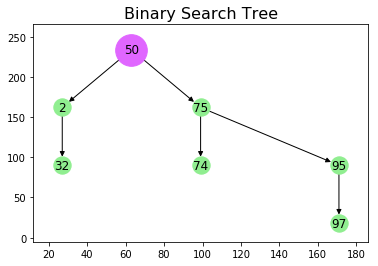

In [831]:
draw_tree(T)

In [832]:
T.predecessor(T.root.r_child)

key:74, value:['Jacky'], rank:1

In [833]:
T.predecessor(T.root.r_child.l_child)

key:50, value:['Alice', 'CYY', 'Mashiro'], rank:7

In [834]:
T.successor(T.root)

key:74, value:['Jacky'], rank:1

In [835]:
T.successor(T.root.r_child.r_child.r_child)  # None

In [836]:
T.successor(T.root.r_child.l_child)

key:75, value:['Bob'], rank:4

In [837]:
T.order_statistic(0) == T.min().key

True

In [838]:
T.order_statistic(6) == T.max().key

True

In [839]:
T.order_statistic(3)  # 4th smallest key

74

In [840]:
T.delete(99)  # nothing happens
print(T)

2:['Glass']
32:['William']
50:['Alice', 'CYY', 'Mashiro']
74:['Jacky']
75:['Bob']
95:['Cathy']
97:['Mevis']



In [841]:
T.delete(50, 'Alice')  # delete values from node 50
print(T)

2:['Glass']
32:['William']
50:['CYY', 'Mashiro']
74:['Jacky']
75:['Bob']
95:['Cathy']
97:['Mevis']



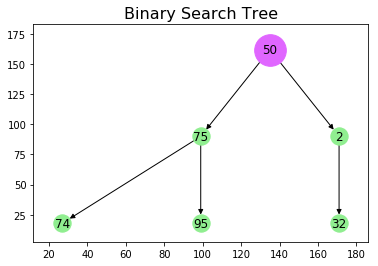

In [842]:
T.delete(97)
draw_tree(T)

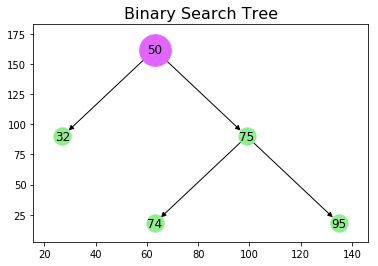

In [843]:
T.delete(2)
draw_tree(T)

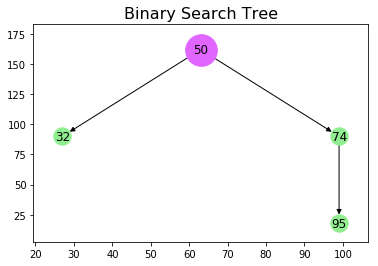

In [844]:
T.delete(75)
draw_tree(T)

In [845]:
print(T)

32:['William']
50:['CYY', 'Mashiro']
74:['Jacky']
95:['Cathy']



In [846]:
class AVLTree(BinarySearchTree):

    def __init__(self, root):
        super.__init__(root)

    def rebalance(self, node):
        self.l_rotate(node) or self.r_rotate(node)  # to be implemented later

## Hash Tables & Bloom Filters

For details read the textbook. In Python, both dictionary and set are hash tables.

1. How to choose the number of buckets?

> In cases you don't know the number of slots in advance, make a dynamic resizable hash table starting from size 1,000. In most cases, you should have a reasonable guess of the size limit.

2. How to choose the prime number for your hash function?

> Depending on your concrete problem to solve, read slides/textbook to find the approporiate universal family, or a polynomial hash function. The prime number should be slightly greater than the size of your hash table, which is also the cardinality of your hash function. Here's a list of good large prime numbers to choose.
http://planetmath.org/goodhashtableprimes

### Self-implemented hash table (chaining)

In [1]:
class PhoneBook:
    ''' A naive implementation of PhoneBook Class based on dynamic resizable hash table.
        In terms of chaining instead of open addressing, contacts data are stored in an array
        of subarrays, where each subarray is a slot like [(num1, name1), (num2, name2), ...]
    '''
    _prime = 12582917  # https://www.planetmath.org/goodhashtableprimes
    _a, _b = 34, 2     # arbitrary integers

    def __init__(self, m):
        ''' DO NOT USE `self.arr = [[]] * m`, write `self.arr = [[] for _ in range(m)]` instead.
            In the 1st case, each subarray is the same subarray, they reference the same object,
            if you change one of them, all subarrays would change together.
        '''
        # https://stackoverflow.com/questions/240178/list-of-lists-changes-reflected-across-sublists-unexpectedly
        self.arr = [[] for _ in range(m)]  # create the nested array for chaining
        self.n = 0  # number of contacts stored
        self.m = m  # number of slots in the array self.arr, also the cardinality of _hash_func()
        
    def __str__(self):
        output = 'Number of contacts: ' + str(self.n) + '\n'
        output += 'Number of slots: ' + str(self.m) + '\n'
        output += 'Load factor: ' + str(self._alpha())
        return output
    
    def head(self, n=5):
        ''' print the first n slots '''
        for slot in self.arr[:n]:
            print(slot)

    def _alpha(self):  # load factor
        return self.n / self.m

    def _hash_func(self, num):
        return ((self._a * num + self._b) % self._prime) % self.m  # _hash_func() changes with self.m when _rehash()

    def insert(self, number, name):
        key = self._hash_func(number)
        for index, contact in enumerate(self.arr[key]):
            if contact[0] == number:
                self.arr[key][index] = (number, name)  # overwrite contact's name
                return
        self.arr[key].append((number, name))
        self.n += 1
        self._rehash()

    def delete(self, number):
        key = self._hash_func(number)
        for index, contact in enumerate(self.arr[key]):
            if contact[0] == number:
                self.arr[key].pop(index)
                self.n -= 1
                break

    def find(self, number):
        key = self._hash_func(number)
        for contact in self.arr[key]:
            if contact[0] == number:
                return contact[1]
        return "not found"

    def _rehash(self):
        ''' ATTENTION: there are some tricky cases in this function.
            after _hash_func() has changed, contacts used to be in the same slot(with the same key)
            might be no longer in the same slot in the new array because the new keys can be different.
            Besides, contacts used to be in different slots might now have the same new key, so they
            are now in the same slot in the new array, and we must merge them, otherwise data is lost.
        '''
        if self._alpha() > 0.8:
            self.m *= 2
            new_arr = [[] for _ in range(self.m)]  # DO NOT WRITE `[[]] * self.m`
            for slot in self.arr:
                for contact in slot:
                    new_key = self._hash_func(contact[0])
                    new_arr[new_key].append(contact)
            self.arr = new_arr

- __Unit Test__

In [2]:
contacts = PhoneBook(2)

In [3]:
print(contacts)
contacts.head()

Number of contacts: 0
Number of slots: 2
Load factor: 0.0
[]
[]


In [4]:
contacts.insert(911, 'police')
print(contacts)
contacts.head()

Number of contacts: 1
Number of slots: 2
Load factor: 0.5
[(911, 'police')]
[]


In [5]:
contacts._hash_func(911) == contacts._hash_func(119)

True

In [6]:
contacts.insert(119, 'fire')
print(contacts)

Number of contacts: 2
Number of slots: 4
Load factor: 0.5


In [7]:
contacts.head()

[(911, 'police'), (119, 'fire')]
[]
[]
[]


In [8]:
contacts.find(119)

'fire'

In [9]:
contacts.find(110)

'not found'

In [10]:
for number in range(10):
    contacts.insert(number, str(number))

In [11]:
print(contacts)

Number of contacts: 12
Number of slots: 16
Load factor: 0.75


In [12]:
contacts.head(10)

[(911, 'police'), (119, 'fire'), (7, '7')]
[]
[(0, '0'), (8, '8')]
[]
[(1, '1'), (9, '9')]
[]
[(2, '2')]
[]
[(3, '3')]
[]


In [13]:
contacts.delete(8)
contacts.delete(3)
print(contacts)

Number of contacts: 10
Number of slots: 16
Load factor: 0.625


In [14]:
contacts.head(10)

[(911, 'police'), (119, 'fire'), (7, '7')]
[]
[(0, '0')]
[]
[(1, '1'), (9, '9')]
[]
[(2, '2')]
[]
[]
[]


- __Stress Test__

In [15]:
import random
import numpy as np

def stress_test(scale):
    contacts = PhoneBook(1000)
    benchmark = {}  # test against Python built-in dictionary
    
    numbers = []    # numbers history list
    error_found = False

    for _ in range(scale):
        operation = ["insert", "delete"][np.random.binomial(n=1, p=.3)]  # 70% insert, 30% delete
        number = random.randint(1, 10000)
        name = str(number)
        numbers.append(number)
        
        if operation == "insert":
            contacts.insert(number, name)
            benchmark[number] = name
        elif operation == "delete":
            contacts.delete(number)
            if number in benchmark:
                del benchmark[number]
        
        # check 1
        rand_num = random.choice(numbers)
        if contacts.find(rand_num) != benchmark.get(rand_num, "not found"):
            print("last operation:", operation, number)
            print("check hash function:", rand_num, "->", contacts._hash_func(rand_num))
            error_found = True
            break
            
        # check 2
        if len(benchmark) != contacts.n:
            print("check hash table size!")
            error_found = True
            break
            
        # check 3
        if contacts._alpha() > 0.8:
            print("check rehash and load factor!")
            error_found = True
            break
        
    if error_found:
        return contacts, benchmark
    else:
        print("Congratulations! Stress Test Passed!")
        return

In [16]:
result = stress_test(10000)

Congratulations! Stress Test Passed!


In [17]:
result = stress_test(100000)

Congratulations! Stress Test Passed!


### Self-implemented hash table (open-addressing)

In [18]:
pass

### Bisect - use binary search to index, insert and maintain a sorted array

https://docs.python.org/3/library/bisect.html

Hash tables are built to support blazingly fast constant time lookups. In some scenarios though, an elaborate design of binary search could be better than hash table lookups within a for-loop, and you might want to use the built-in `bisect` module.

In [8]:
import bisect

In [9]:
x = [1, 23, 45, 12, 23, 42, 54, 123, 14, 52, 3]
x.sort()
x

[1, 3, 12, 14, 23, 23, 42, 45, 52, 54, 123]

In [10]:
bisect.bisect(x, 3.0)  # returns the position if to be inserted

2

In [11]:
bisect.insort(x, 3.0)
x

[1, 3, 3.0, 12, 14, 23, 23, 42, 45, 52, 54, 123]